In [1]:
import numpy as np
import pandas as pd
%matplotlib inLine
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
CO2_init = pd.read_csv("/Users/vicros/Documents/Digethic Data Science/Module/PROJEKT/CO2_passenger_cars.csv", sep=";", low_memory=False)

In [3]:
# TEIL 1 - DATA UNTERSUCHUNG UND VISUALISIERUNG

In [4]:
# Nummer von Instanzen und Atributten in Dataset
CO2_init.shape

(1048575, 33)

In [5]:
CO2_init.head(10)

ID  MS       Mp  VFN       Mh          Man          MMS  \
0  3034815  FR  RENAULT  NaN  RENAULT  RENAULT SAS      RENAULT   
1  3034852  FR  RENAULT  NaN  RENAULT  RENAULT SAS      RENAULT   
2  3034859  FR  RENAULT  NaN  RENAULT  RENAULT SAS      RENAULT   
3  3034866  FR  RENAULT  NaN  RENAULT  RENAULT SAS      RENAULT   
4  3034873  FR  RENAULT  NaN  RENAULT  RENAULT SAS      RENAULT   
5  3034951  FR  RENAULT  NaN  RENAULT  RENAULT SAS  RENAULT SAS   
6  3034957  FR  RENAULT  NaN  RENAULT  RENAULT SAS  RENAULT SAS   
7  3034963  FR  RENAULT  NaN  RENAULT  RENAULT SAS  RENAULT SAS   
8  3044658  FR  RENAULT  NaN  RENAULT  RENAULT SAS      RENAULT   
9  3044666  FR  RENAULT  NaN  RENAULT  RENAULT SAS      RENAULT   

                   TAN    T    Va  ... Fm ec (cm3) ep (KW) z (Wh/km)   It  \
0  E2*2001/116*0327*80    R  2RAJ  ...  M   1461.0    66.0       NaN  NaN   
1  E2*2001/116*0327*80    R  2RAJ  ...  M   1461.0    66.0       NaN  NaN   
2  E2*2001/116*0327*80    R  2RAJ  ...  M   1461.0    66.0       NaN  NaN   
3  E2*2001/116*0327*80    R  2RAJ  ...  M   1461.0    66.0       NaN  NaN   
4  E2*2001/116*0327*80    R  2RAJ  ...  M   1461.0    66.0       NaN  NaN   
5   E2*2007/46*0475*04  RFE   HF2  ...  M   1197.0    96.0       NaN  NaN   
6   E2*2007/46*0475*04  RFE   HF2  ...  M   1197.0    96.0       NaN  NaN   
7   E2*2007/46*0475*04  RFE   HF2  ...  M   1197.0    96.0       NaN  NaN   
8  E2*2001/116*0327*80    R  2RAJ  ...  M   1461.0    66.0       NaN  NaN   
9  E2*2001/116*0327*80    R  2RAJ  ...  M   1461.0    66.0       NaN  NaN   

   Ernedc (g/km)  Erwltp (g/km)  De  Vf  r  
0            NaN            NaN NaN NaN  1  
1            NaN            NaN NaN NaN  1  
2            NaN            NaN NaN NaN  1  
3            NaN            NaN NaN NaN  1  
4            NaN            NaN NaN NaN  1  
5            NaN            NaN NaN NaN  1  
6            NaN            NaN NaN NaN  1  
7            NaN            NaN NaN NaN  1  
8            NaN            NaN NaN NaN  1  
9            NaN            NaN NaN NaN  1  

[10 rows x 33 columns]

In [6]:
# Es werden nur die Daten aus Deutschland ausgewählt
CO2_init_DE = CO2_init.loc[CO2_init['MS'] == 'DE']

In [7]:
CO2_init_DE

ID  MS           Mp  VFN          Mh            Man  \
3334     1384251  DE  VW GROUP PC  NaN        SEAT        SEAT SA   
12419    1407134  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
12429    1373238  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
12430    1392127  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
12435    1364262  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
...          ...  ..          ...  ...         ...            ...   
1045283  1375229  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
1045285  1376822  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
1045286  1352974  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
1045287  1404304  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   
1045288  1383011  DE  VW GROUP PC  NaN  VOLKSWAGEN  VOLKSWAGEN AG   

                   MMS                  TAN    T           Va  ... Fm  \
3334          SEAT (E)  E9*2001/116*0067*37   6J       SCCJZD  ...  M   
12419    VOLKSWAGEN-VW   E1*2007/46*0623*20   AU   GAC4CXXBX0  ...  M   
12429    VOLKSWAGEN-VW   E1*2007/46*0623*30   AU   GAC4CHZCX0  ...  M   
12430    VOLKSWAGEN-VW   E1*2007/46*0627*28  AUV    VACDDYAX0  ...  M   
12435    VOLKSWAGEN-VW   E1*2007/46*0623*22   AU  GAC45CZEAX0  ...  M   
...                ...                  ...  ...          ...  ... ..   
1045283  VOLKSWAGEN-VW  E1*2001/116*0252*49   2K     AFDFSFX0  ...  M   
1045285  VOLKSWAGEN-VW   E1*2007/46*0623*31   AU   GAC4DLBAX0  ...  M   
1045286  VOLKSWAGEN-VW  E1*2001/116*0220*44  7HC   MCXHA308X0  ...  M   
1045287  VOLKSWAGEN-VW   E1*2007/46*0539*23   16     ABCZDAX0  ...  M   
1045288  VOLKSWAGEN-VW  E1*2001/116*0307*50   3C     ACDFHAX1  ...  M   

        ec (cm3) ep (KW) z (Wh/km)   It  Ernedc (g/km)  Erwltp (g/km)  De  Vf  \
3334      1197.0    81.0       NaN  NaN            NaN            NaN NaN NaN   
12419     1598.0    81.0       NaN  NaN            NaN            NaN NaN NaN   
12429      999.0    81.0       NaN  NaN            NaN            NaN NaN NaN   
12430     1598.0    85.0       NaN  NaN            NaN            NaN NaN NaN   
12435     1395.0   110.0       NaN  NaN            NaN            NaN NaN NaN   
...          ...     ...       ...  ...            ...            ...  ..  ..   
1045283   1968.0    55.0       NaN  NaN            NaN            NaN NaN NaN   
1045285   1984.0   180.0       NaN  NaN            NaN            NaN NaN NaN   
1045286   1968.0   110.0       NaN  NaN            NaN            NaN NaN NaN   
1045287   1395.0   110.0       NaN  NaN            NaN            NaN NaN NaN   
1045288   1968.0   140.0       NaN  NaN            NaN            NaN NaN NaN   

           r  
3334      39  
12419    119  
12429     13  
12430     15  
12435      1  
...      ...  
1045283    2  
1045285   39  
1045286    2  
1045287    3  
1045288   60  

[19600 rows x 33 columns]

In [8]:
CO2_init_DE.shape

(19600, 33)

In [9]:
# ID = Identification Number
# MS = member State
# Mp = Manufacturer pooling
# VFN = Vehicle family identification number ---> eliminar
# Mh = Manufacturer name/EU standard denomination--> eliminar
# Man = Manufacturer name OEM declaration
# MMS = Manufacturer name/MS registry denomination ---> eliminar
# TAN = Type approval number---->eliminar
# T = Type
# Va = Variant ----> eliminar
# Ve = Version -----> eliminar
# Mk = Make
# Cn = Commercial Name
# Ct = Category of the vehicle type approved
# Cr = Category of the vehicle registered
# m (kg) = Mass in running order
# Mt = WLTP test mas
# Enedc (g/km) = 
# Ewltp (g/km) = Specific CO2 Emissions (WLTP)
# W (mm) = Wheel Base
# At1 (mm) = Axle width steering axle
# At2 (mm) = Axle width other axle
# Ft = Fuel type
# Fm = Fuel mode
# ec (cm3) = Engine capacity
# ep (KW)= Engine power
# z (Wh/km) = Electric energy consumption
# It = Innovative technology or group of innovative technologies
# Ernedc (g/km) = Emissions reduction through innovative technologies
# Erwltp (g/km) = Emissions reduction through innovative technologies (WLTP)
# De = Deviation factor
# Vf = Verification factor
# r = Total new registrations

In [10]:
CO2_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ID             1048575 non-null  int64  
 1   MS             1048575 non-null  object 
 2   Mp             765181 non-null   object 
 3   VFN            148 non-null      object 
 4   Mh             1048575 non-null  object 
 5   Man            1048575 non-null  object 
 6   MMS            988697 non-null   object 
 7   TAN            1046891 non-null  object 
 8   T              1048198 non-null  object 
 9   Va             1046798 non-null  object 
 10  Ve             1044682 non-null  object 
 11  Mk             1047215 non-null  object 
 12  Cn             1048315 non-null  object 
 13  Ct             1048573 non-null  object 
 14  Cr             793126 non-null   object 
 15  m (kg)         1048518 non-null  float64
 16  Mt             213 non-null      float64
 17  Enedc (g

In [11]:
# Als Target wird das alte Protokol genommen,Enedc (g/km), statt das neue Ewltp (g/km), weil auf die letze die Mehrheit der Daten fehlen.

In [12]:
# Auf die erste Visualisierung finden wir schon features die zu entfernen sind, da nicht mehrwert sind 
# oder mit Datentyp "Objekt" die sehr schwer zu kodieren sind. Beispielsweise:

In [13]:
CO2_init["T"].value_counts()

R        74929
C        45694
SD       39738
M        27778
S        23401
         ...  
6S31         1
6S72         1
6T51         1
6T91         1
LD 90        1
Name: T, Length: 1097, dtype: int64

In [14]:
CO2_init["Ct"].value_counts() # Die sind alle passenger vehicles, deswegen ist das nicht Mehrwert

M1     1033644
M1G       9809
M1        4180
m1         929
N1          10
N1G          1
Name: Ct, dtype: int64

In [15]:
CO2_init["VFN"].value_counts()

IP-02-VF3-2017-2240    65
IP-02-VF3-2017-3120    35
IP-02-VF3-2017-2420    25
IP-02-VF3-2017-2140    21
IP-02-VF3-2017-3240     1
IP-02-VF3-2017-2120     1
Name: VFN, dtype: int64

In [16]:
# Features werden entfernt:
CO2_raw = CO2_init_DE.drop(columns=['MS','ID', 'VFN', 'Mh', 'MMS', 'TAN', 'Man','Va', 'Ve','Mt', 'Ewltp (g/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'r', 'At2 (mm)', 'Ct', 'Cr', 'It', 'T', 'z (Wh/km)'])

In [17]:
# Der neue Datensatz ohne Encoding:
CO2_raw.head(10)

Mp          Mk        Cn  m (kg)  Enedc (g/km)  W (mm)  \
3334   VW GROUP PC        SEAT     IBIZA  1102.0         119.0  2469.0   
12419  VW GROUP PC  VOLKSWAGEN      GOLF  1321.0          99.0  2620.0   
12429  VW GROUP PC  VOLKSWAGEN      GOLF  1257.0         109.0  2620.0   
12430  VW GROUP PC  VOLKSWAGEN      GOLF  1395.0         103.0  2620.0   
12435  VW GROUP PC  VOLKSWAGEN      GOLF  1280.0         109.0  2620.0   
12436  VW GROUP PC  VOLKSWAGEN     JETTA  1325.0         114.0  2648.0   
12441  VW GROUP PC  VOLKSWAGEN  MULTIVAN  1946.0         155.0  3000.0   
12442  VW GROUP PC  VOLKSWAGEN     KOMBI  2043.0         171.0  3000.0   
12455  VW GROUP PC  VOLKSWAGEN    TIGUAN  1592.0         163.0  2677.0   
12457  VW GROUP PC  VOLKSWAGEN      GOLF  1332.0         124.0  2620.0   

       At1 (mm)      Ft Fm  ec (cm3)  ep (KW)  
3334     1465.0  PETROL  M    1197.0     81.0  
12419    1527.0  DIESEL  M    1598.0     81.0  
12429    1549.0  PETROL  M     999.0     81.0  
12430    1549.0  DIESEL  M    1598.0     85.0  
12435    1527.0  PETROL  M    1395.0    110.0  
12436    1541.0  PETROL  M    1197.0     77.0  
12441    1634.0  DIESEL  M    1968.0     75.0  
12442    1634.0  DIESEL  M    1968.0    150.0  
12455    1576.0  PETROL  M    1395.0    110.0  
12457    1533.0  PETROL  M    1395.0    110.0

In [18]:
# Die neue Instanzen und Features
CO2_raw.shape

(19600, 11)

In [19]:
# Sub-Kategorien im Feature 'Öltyp'
CO2_init["Ft"].value_counts()

PETROL                       324615
Petrol                       261698
DIESEL                       222247
Diesel                       210856
ELECTRIC                       6438
diesel                         4217
Petrol/Electric                4182
petrol                         3156
Electric                       2189
DIESEL                         2184
LPG                            2053
PETROL/ELECTRIC                1359
PETROL                         1004
NG-BIOMETHANE                   988
NG-biomethane                   735
Diesel/Electric                 270
E85                             141
electric                         91
LPG                              73
NG-biomethane                    17
Electric                         12
Hydrogen                         10
OTHER                             1
Name: Ft, dtype: int64

In [20]:
# Homogenisieren der Daten für Atributt 'Fuel Type'- Öltyp 
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['DIESEL'],'Diesel')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL'],'Petrol')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['ELECTRIC', 'electric' ],'Electric')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['petrol'],'Petrol')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['diesel'],'Diesel')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['DIESEL                   '],'Diesel')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL                   '],'Petrol')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['Electric                 '],'Electric')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL/ELECTRIC'],'Petrol/Electric')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['LPG                      '],'LPG')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['NG-biomethane            '],'NG-biomethane')
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['NG-BIOMETHANE'],'NG-biomethane')

In [21]:
# Die homogenisierte Öltypen
CO2_raw["Ft"].value_counts()

Diesel             9920
Petrol             9095
Petrol/Electric     240
NG-biomethane       133
Electric            102
LPG                  75
Diesel/Electric      35
Name: Ft, dtype: int64

In [22]:
# Registrierte Fzg. per OEM
CO2_raw["Mp"].value_counts()

DAIMLER AG           7623
VW GROUP PC          4122
GENERAL MOTORS       1789
BMW GROUP            1530
RENAULT               995
MITSUBISHI MOTORS     164
KIA                   128
SUZUKI POOL            18
Name: Mp, dtype: int64

In [23]:
# Registrierte Fzg. per Marke
CO2_raw["Mk"].value_counts()

MERCEDES-BENZ           7388
OPEL                    2786
VOLKSWAGEN              2210
BMW                     1242
AUDI                    1229
RENAULT                  709
SEAT                     668
DACIA                    294
CITROEN                  270
MAZDA                    242
MERCEDES-AMG             231
MINI                     229
PEUGEOT                  177
MITSUBISHI               157
KIA                      129
NISSAN                   112
ASTON MARTIN              64
LOTUS                     43
BMW I                     30
ROLLS-ROYCE               29
ALPINA                    24
MORGAN                    22
SUZUKI                    17
FERRARI                   16
MCLAREN                   15
DS                        10
KTM                        7
PORSCHE                    7
INFINITI                   6
FIAT                       6
LADA AUTOMOBILE GMBH       3
SMART                      3
TOYOTA                     3
MAN                        2
DONKERVOORT   

In [24]:
# Registrierte fzg. per Fzg. Model
CO2_raw["Cn"].value_counts()

ZAFIRA TOURER    875
GOLF             662
VITO TOURER      603
V-KLASSE         599
E 220 D          390
                ... 
C 350 4MATIC       1
PEUGEOT 107        1
TOYOTA C-HR        1
DODGE DURANO       1
AMG S 63           1
Name: Cn, Length: 837, dtype: int64

In [25]:
# Estatistik der Variable bzw- Target
CO2_raw['Enedc (g/km)'].describe()

count    19582.000000
mean       142.326933
std         40.469425
min          0.000000
25%        118.000000
50%        137.000000
75%        158.000000
max        539.000000
Name: Enedc (g/km), dtype: float64

In [26]:
# Target versus Öltyp Estatistik
grouped_data = CO2_raw.groupby('Ft')['Enedc (g/km)']
grouped_data.describe()

count        mean        std    min    25%    50%    75%  \
Ft                                                                           
Diesel           9918.0  135.959468  27.457422   22.0  114.0  130.0  156.0   
Diesel/Electric    35.0   94.200000  18.194699   49.0   99.0  100.0  104.0   
Electric          102.0    0.000000   0.000000    0.0    0.0    0.0    0.0   
LPG                74.0  162.635135  81.646679  109.0  118.0  143.0  149.0   
NG-biomethane     133.0  119.338346  24.448736   79.0  109.0  116.0  136.0   
Petrol           9080.0  153.525991  44.842370   55.0  127.0  142.0  167.0   
Petrol/Electric   240.0   55.750000  26.795444   12.0   49.0   53.0   59.0   

                   max  
Ft                      
Diesel           309.0  
Diesel/Electric  106.0  
Electric           0.0  
LPG              413.0  
NG-biomethane    267.0  
Petrol           539.0  
Petrol/Electric  164.0

In [40]:
# Grafiken der Features

In [11]:
CO2_raw['Ft'] = CO2_raw['Ft'].replace(['PETROL/ELECTRIC'],'Petrol/Electric')

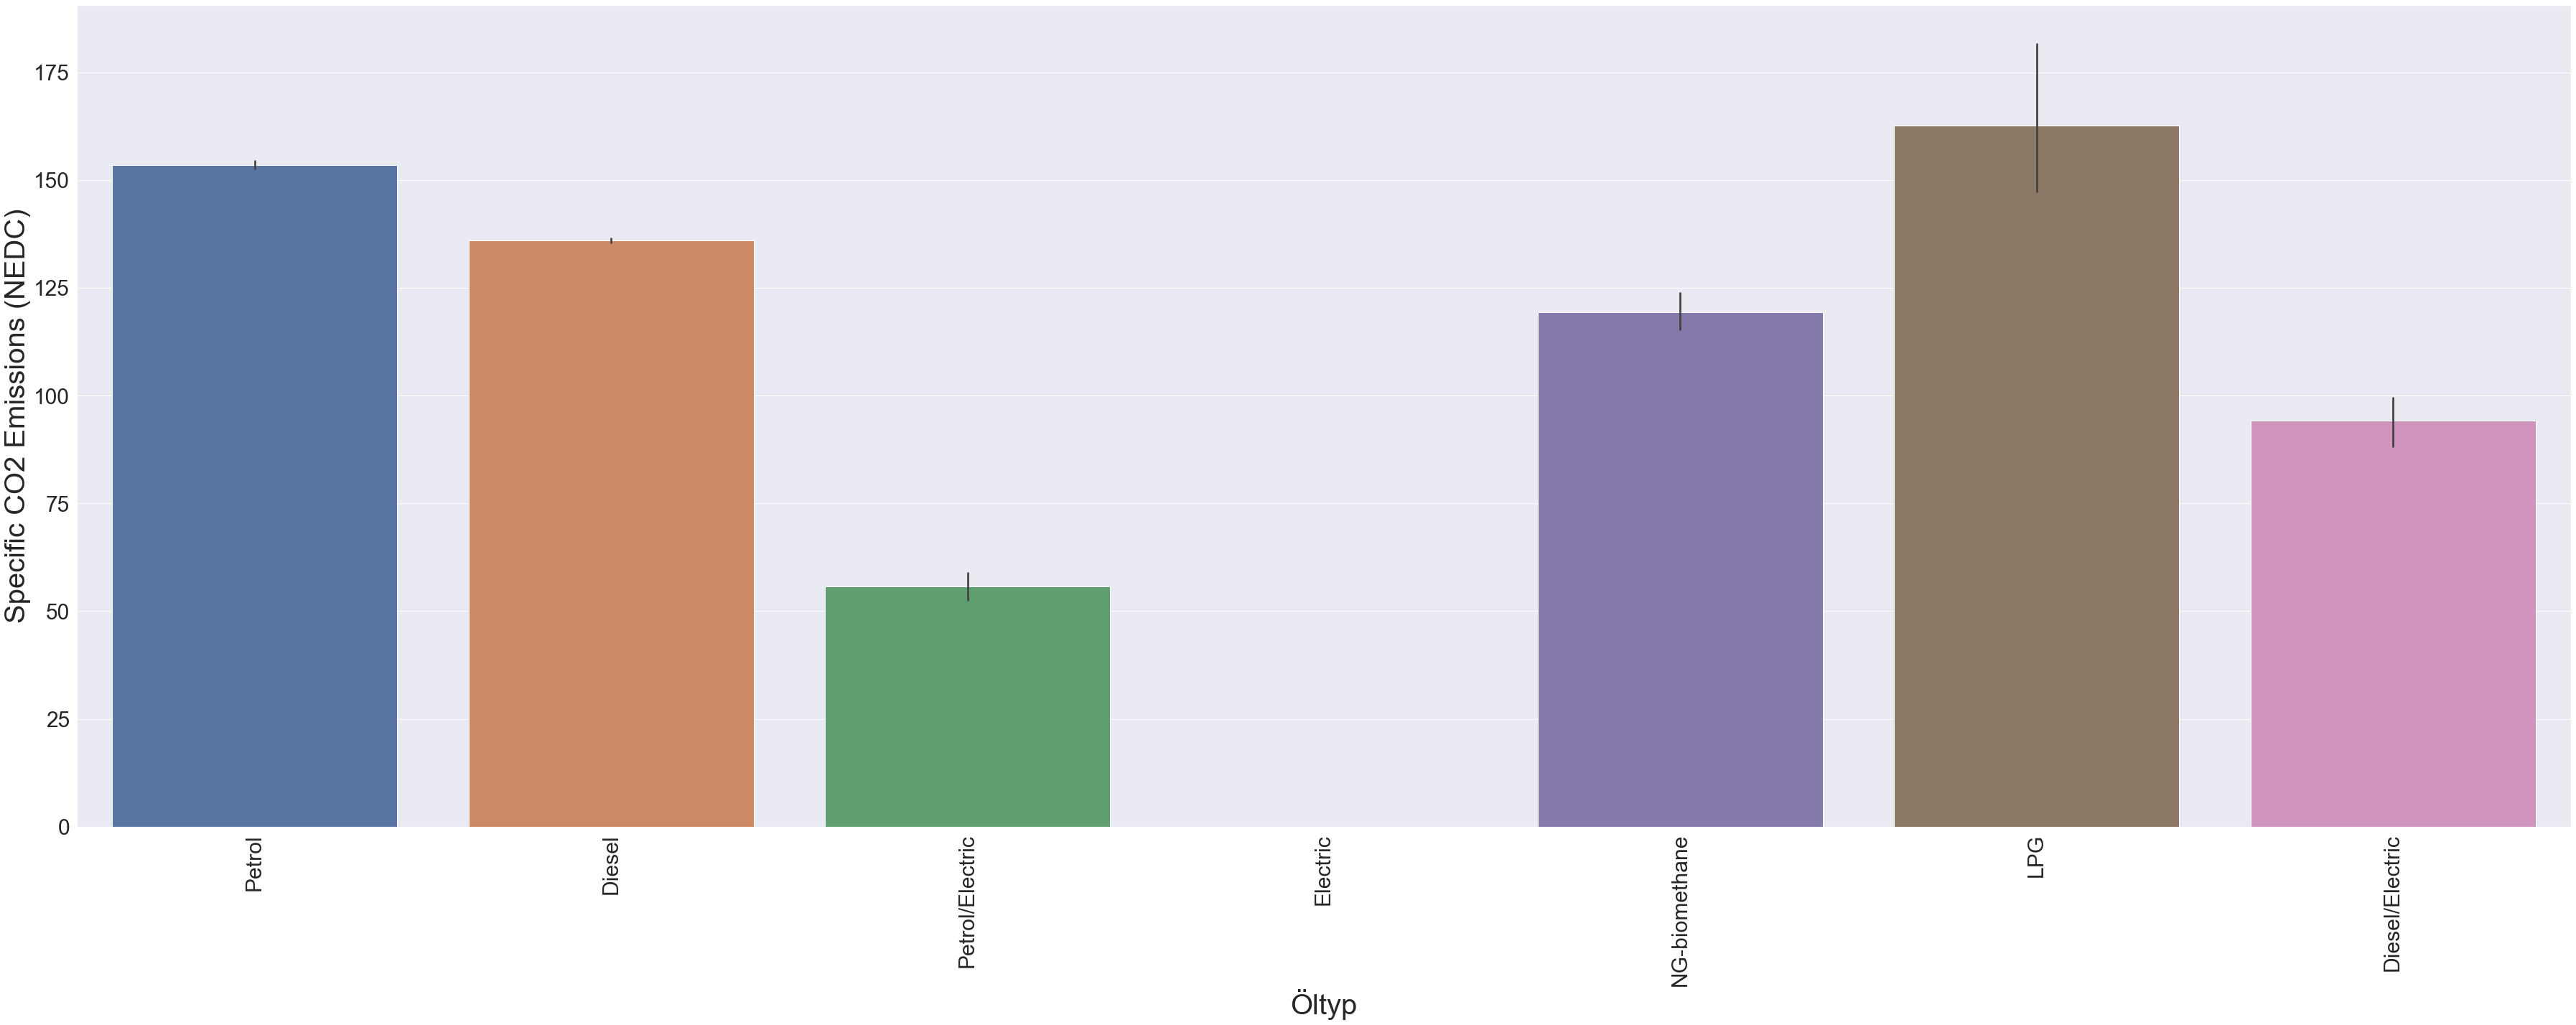

In [70]:
# Spezifische CO2 Emissionen per Öltyp in Deutschland
import seaborn as sns
sns.barplot(x="Ft",y="Enedc (g/km)",data=CO2_raw)
sns.set(rc = {'figure.figsize':(50,20)})
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Öltyp', fontsize=40);
plt.ylabel('Specific CO2 Emissions (NEDC)', fontsize=40);
plt.tight_layout()

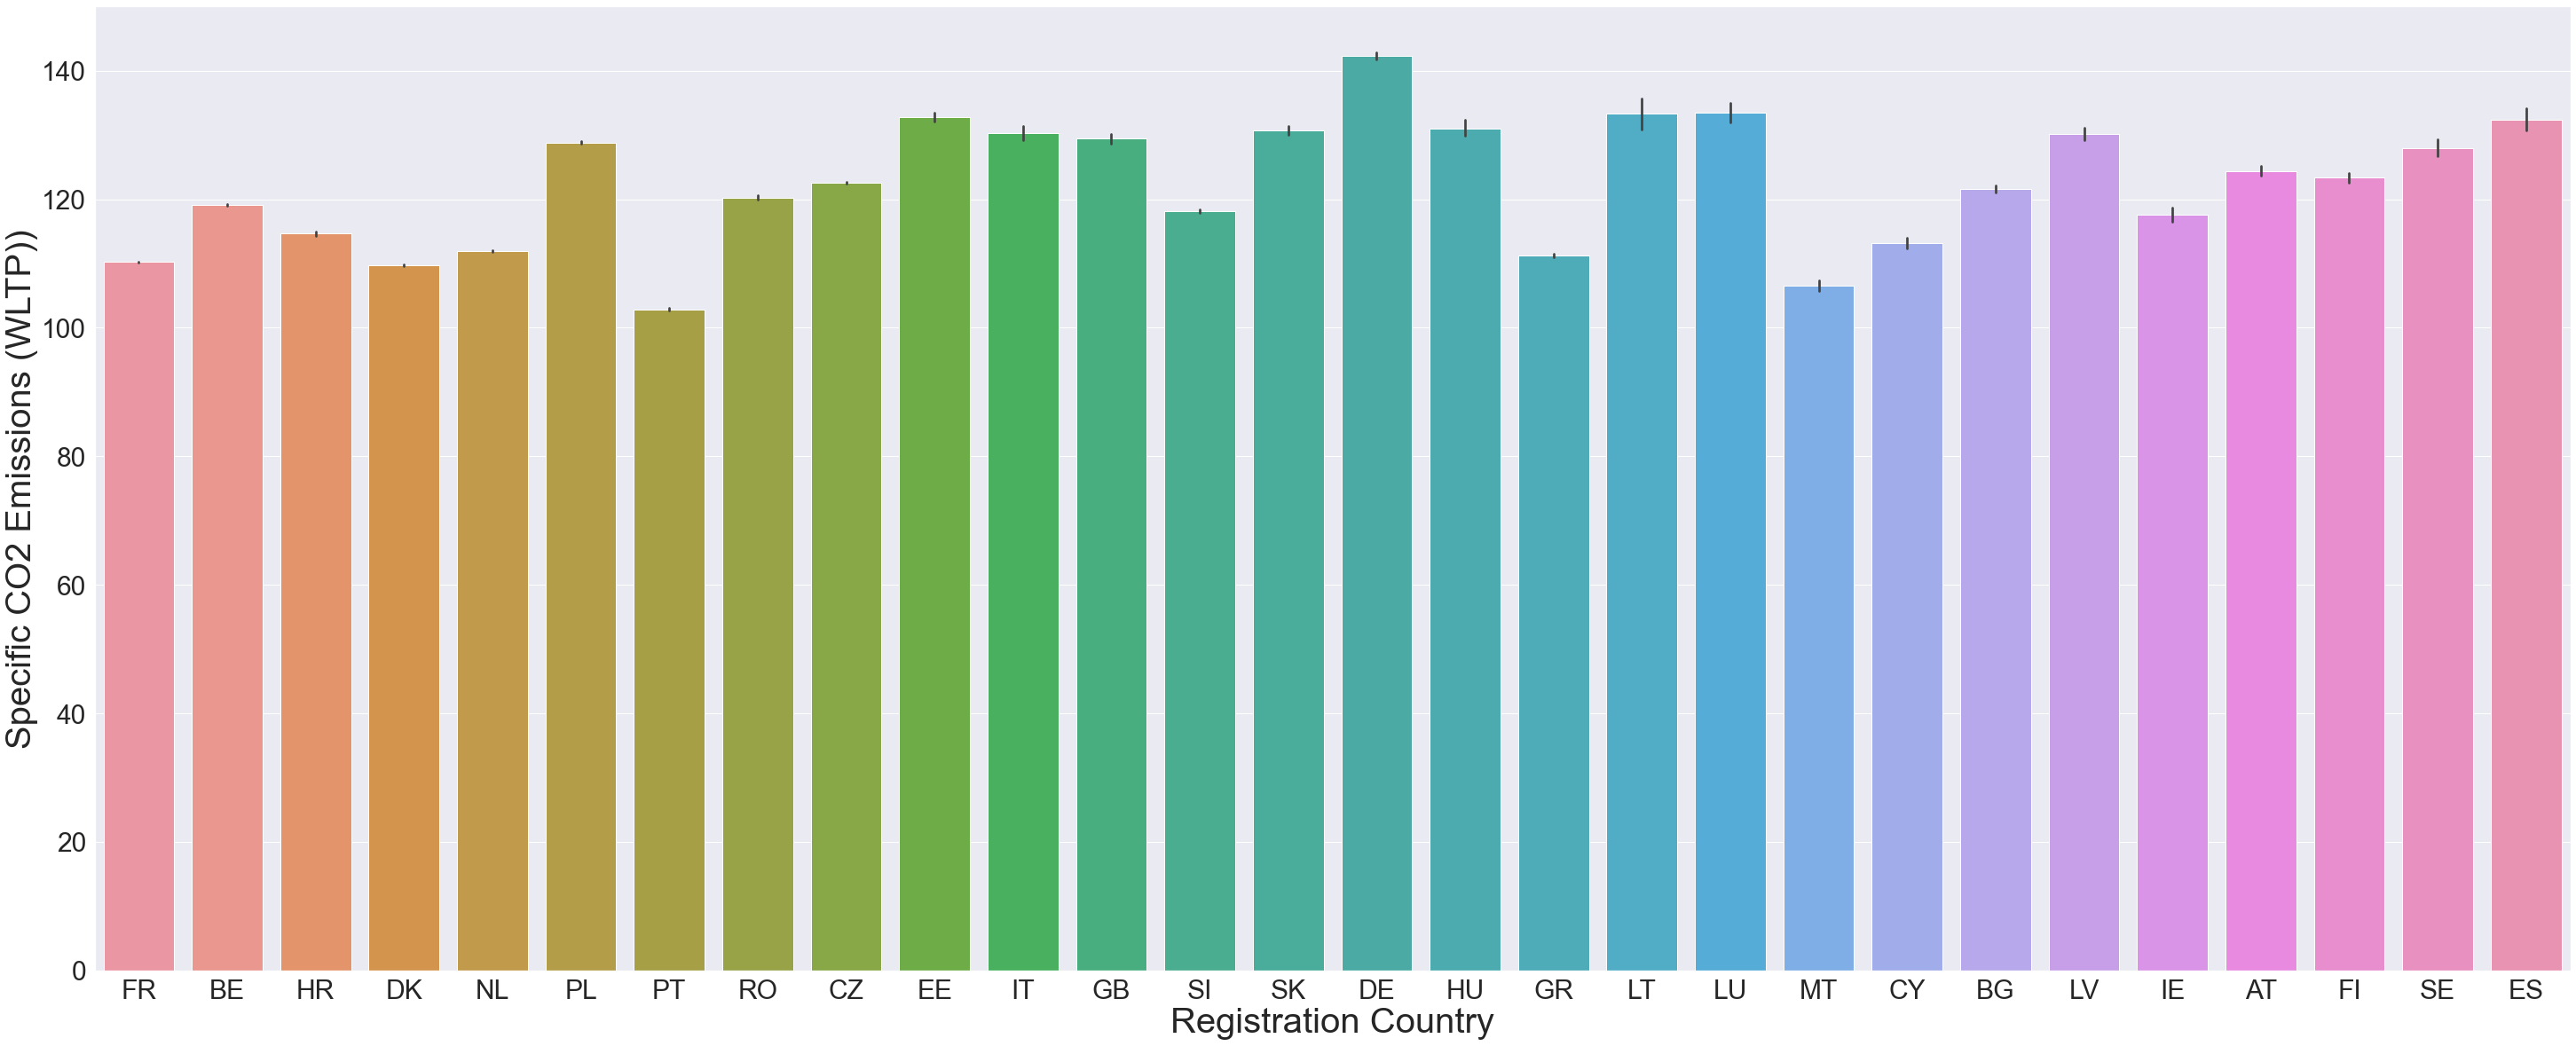

In [71]:
# Spezifische CO2 Emissionen per Land in Initiale Daten --> Deutscland am höchsten
sns.barplot(x="MS",y="Enedc (g/km)",data=CO2_init)
sns.set(rc = {'figure.figsize':(40,30)})
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Registration Country', fontsize=40);
plt.ylabel('Specific CO2 Emissions (WLTP))', fontsize=40);
plt.show()

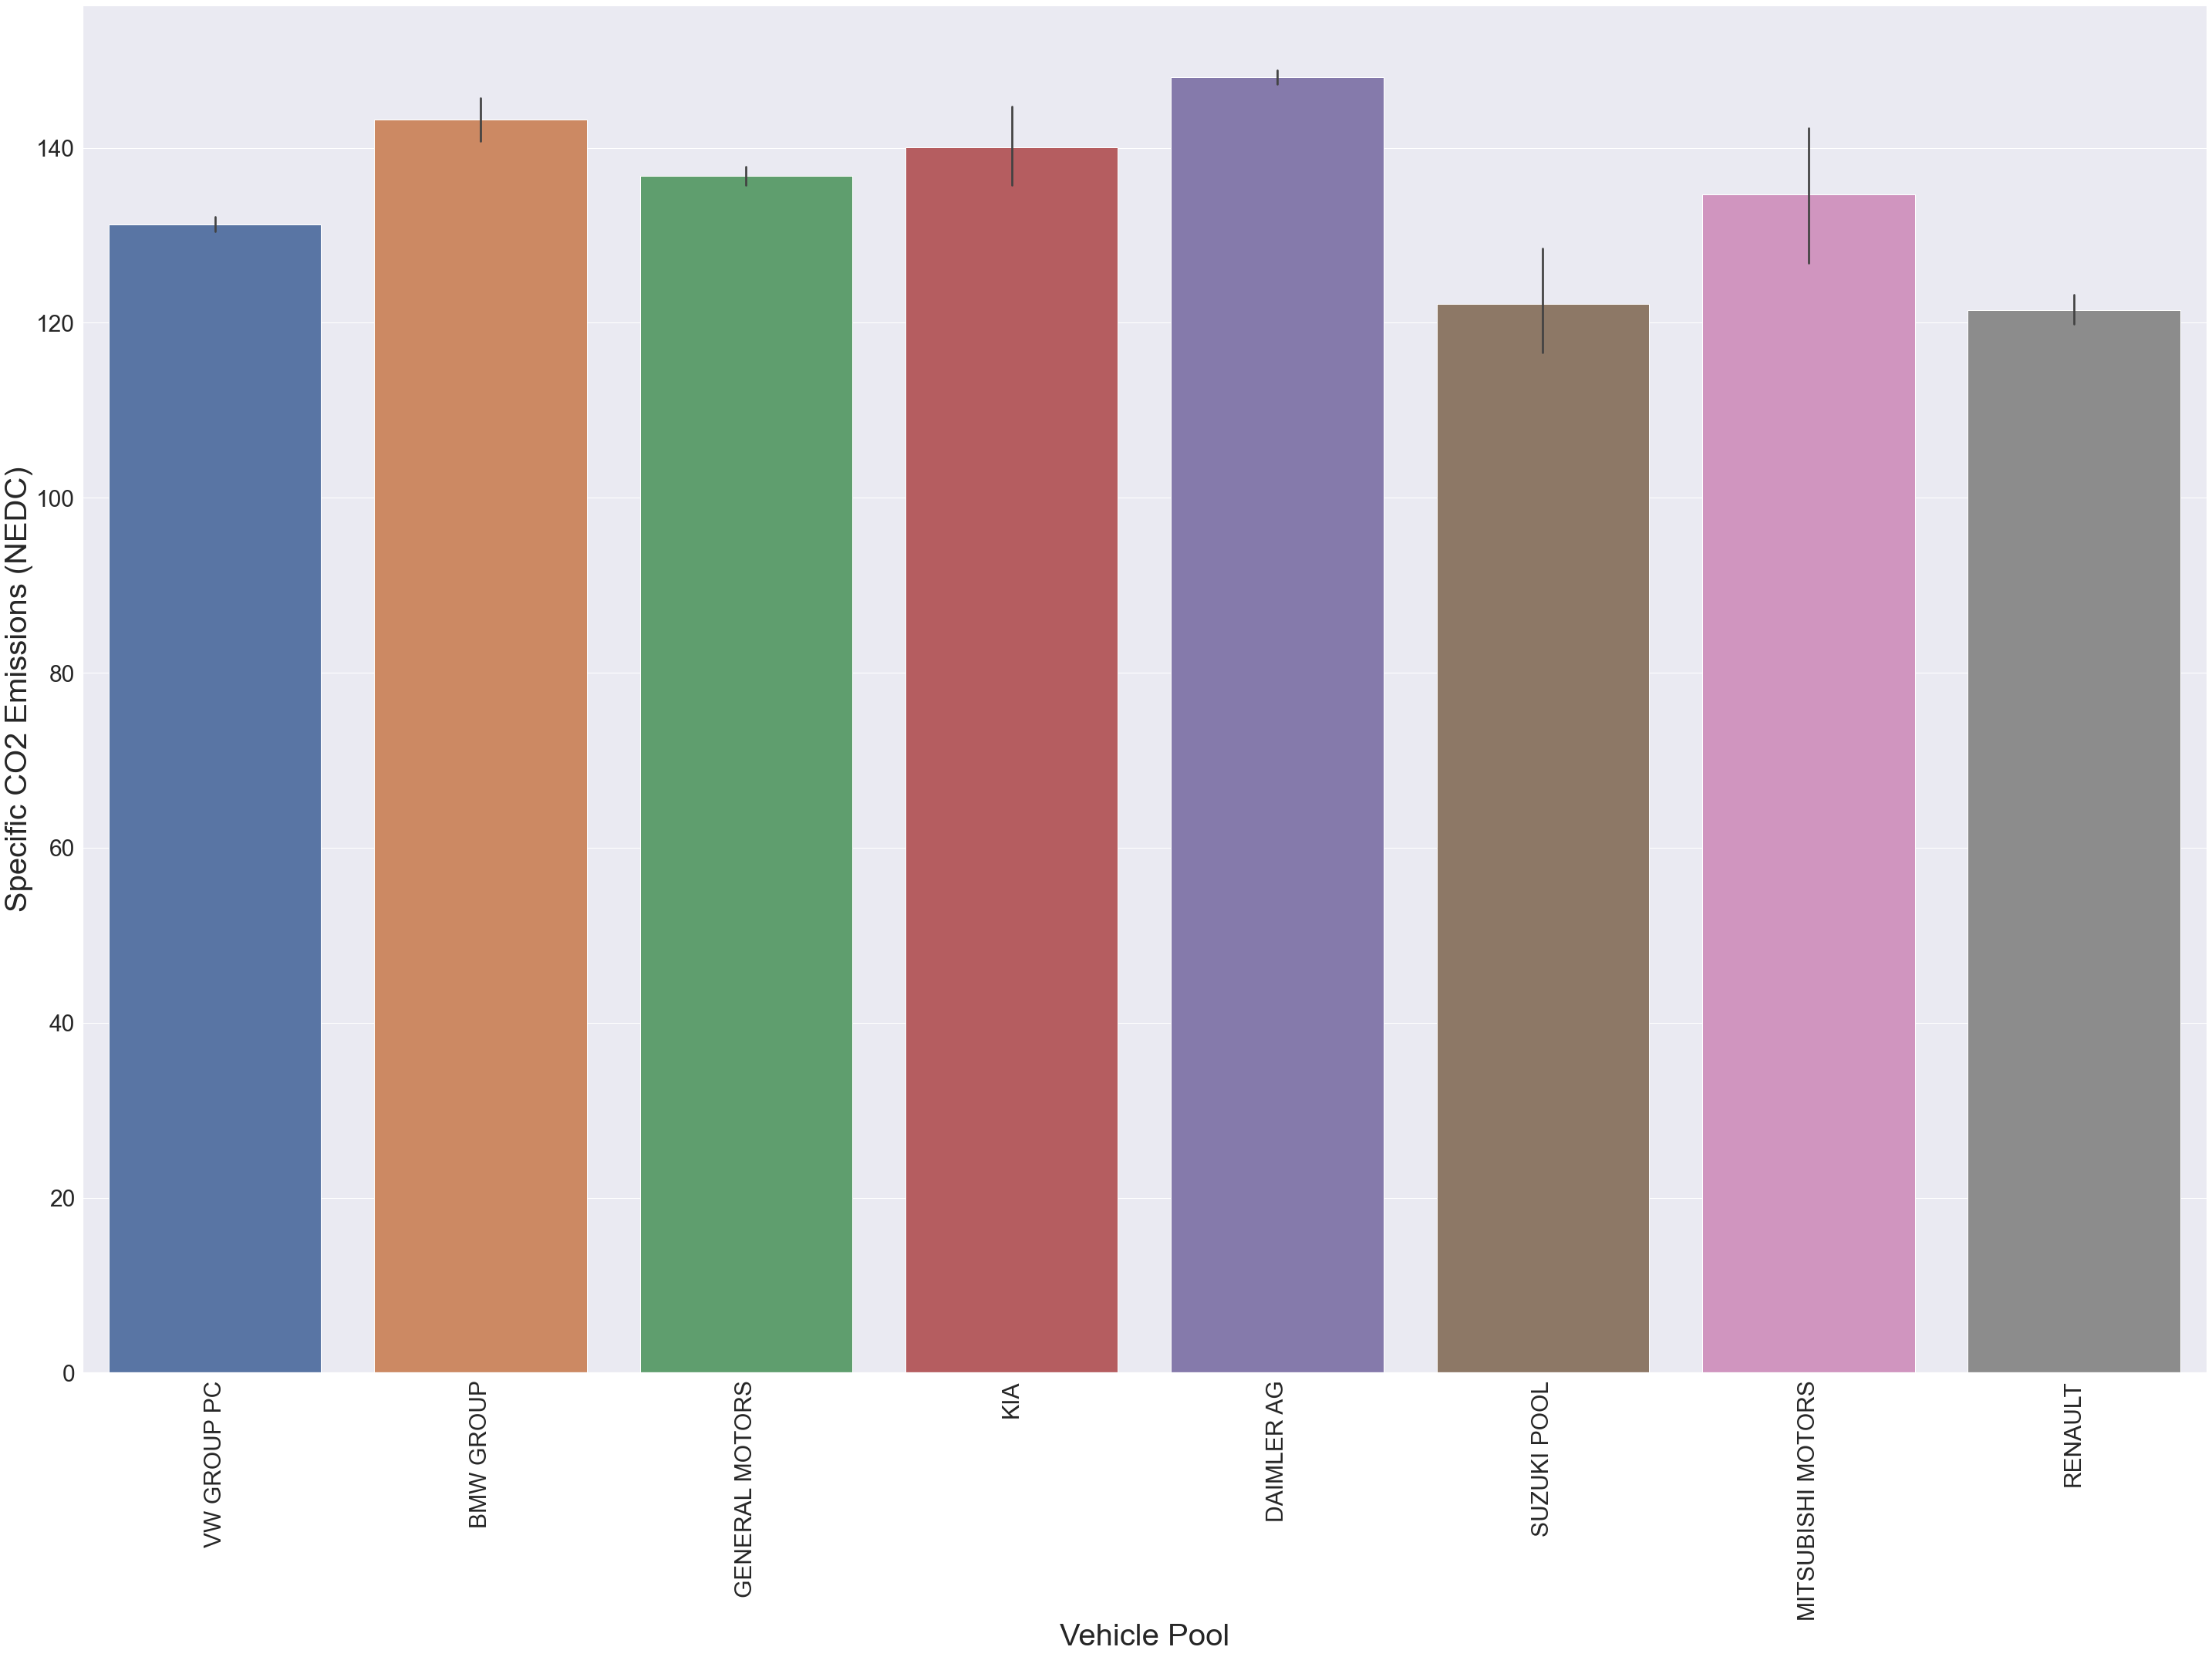

In [72]:
# Spezifische CO2 Emissionen per OEM in Deutschland
import seaborn as sns
sns.barplot(x="Mp",y="Enedc (g/km)",data=CO2_raw)
sns.set(rc = {'figure.figsize':(50,20)})
plt.xticks(rotation=90)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Vehicle Pool', fontsize=40);
plt.ylabel('Specific CO2 Emissions (NEDC)', fontsize=40);
plt.tight_layout()

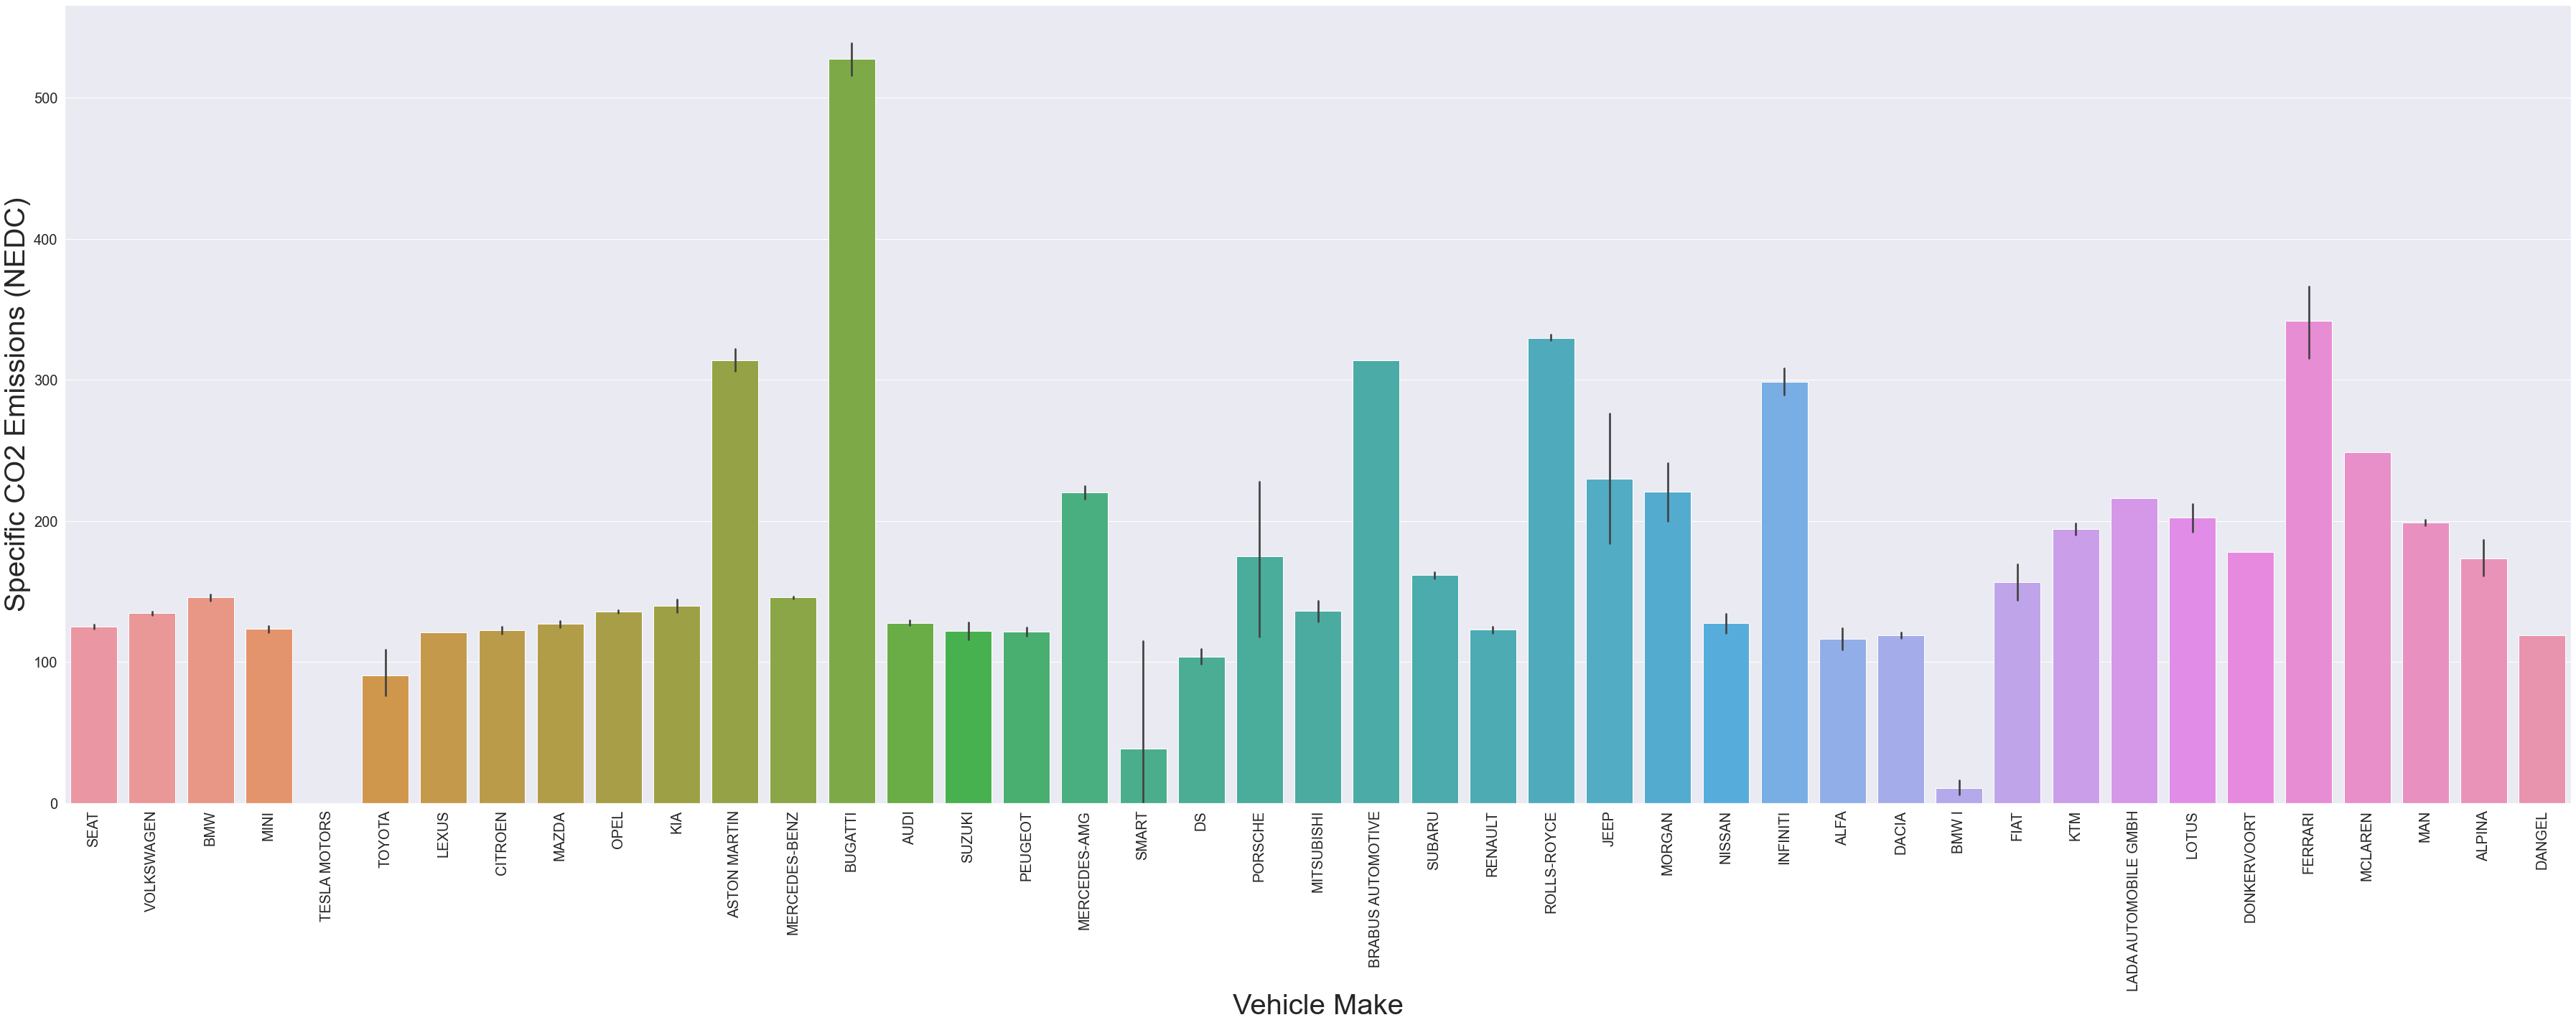

In [73]:
# Spezifische CO2 Emissionen per Marke in Deutschland
import seaborn as sns
sns.barplot(x="Mk",y="Enedc (g/km)",data=CO2_raw)
sns.set(rc = {'figure.figsize':(50,20)})
plt.xticks(rotation=90)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Vehicle Make', fontsize=40);
plt.ylabel('Specific CO2 Emissions (NEDC)', fontsize=40);
plt.tight_layout()

In [27]:
CO2_raw_final = CO2_raw.drop(columns=['Cn'])
CO2_raw_final.shape

(19600, 10)

/var/folders/5v/x5bgf8yj34q8c1bw3hrcktcm0000gn/T/ipykernel_766/2211948406.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  CO2_raw_final.hist(ax = ax)


array([[<AxesSubplot:title={'center':'m (kg)'}>,
        <AxesSubplot:title={'center':'Enedc (g/km)'}>],
       [<AxesSubplot:title={'center':'W (mm)'}>,
        <AxesSubplot:title={'center':'At1 (mm)'}>],
       [<AxesSubplot:title={'center':'ec (cm3)'}>,
        <AxesSubplot:title={'center':'ep (KW)'}>]], dtype=object)

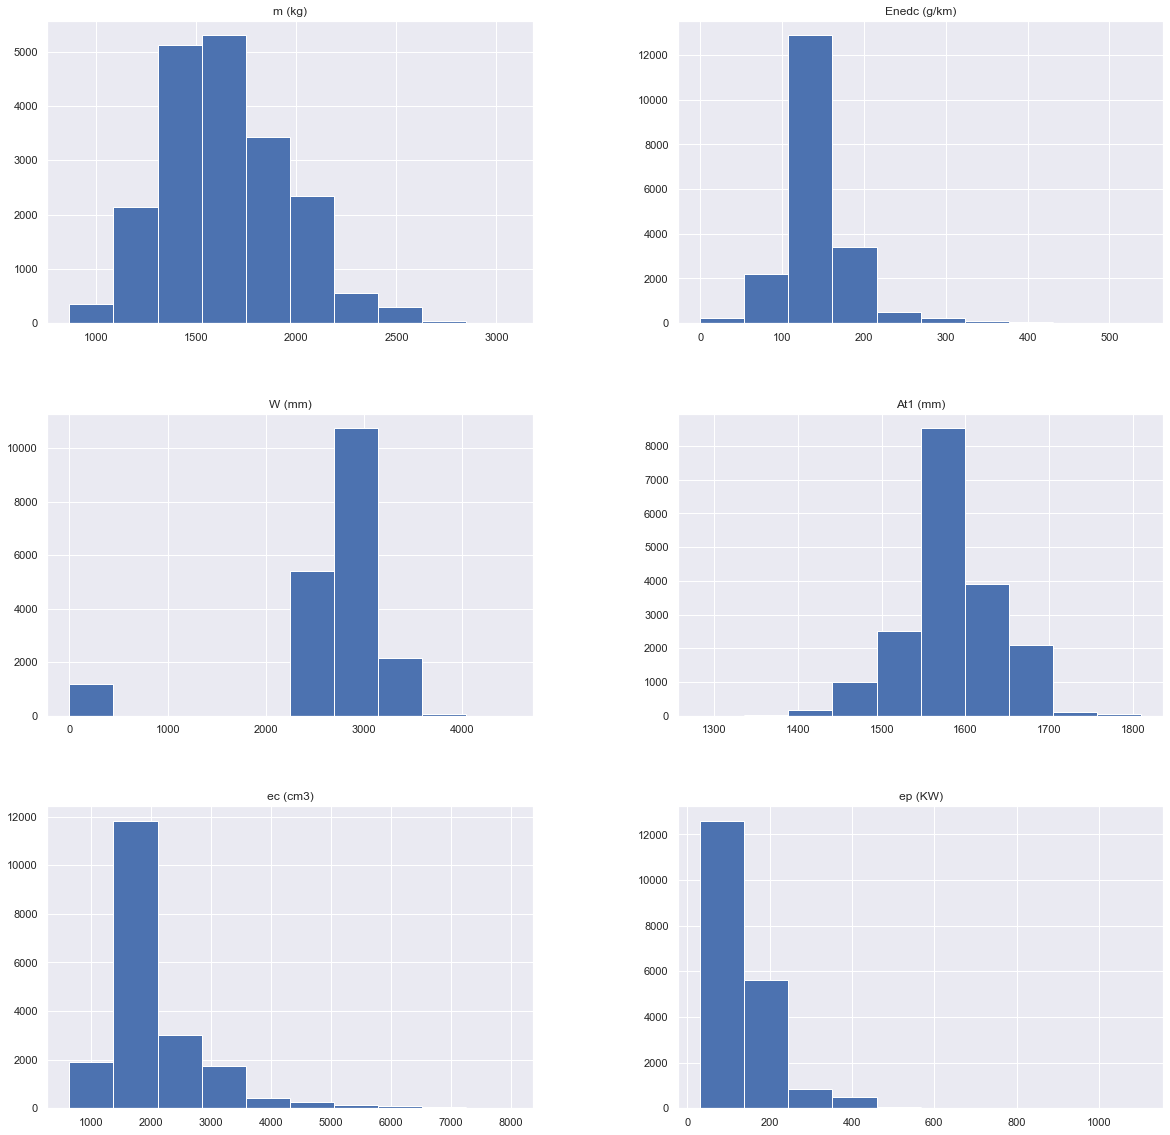

In [77]:
# Visualisierung des Histograms per Atributt 
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
CO2_raw_final.hist(ax = ax)

In [ ]:
# TEIL 2 ---> DATA PRE-PROCESSING

In [ ]:
# A MISSING VALUES

In [28]:
# Fehlende Daten je nach Atributt
CO2_raw_final.isna().sum()

Mp              3231
Mk              1206
m (kg)            38
Enedc (g/km)      18
W (mm)            33
At1 (mm)        1207
Ft                 0
Fm                 0
ec (cm3)         103
ep (KW)            5
dtype: int64

In [29]:
cat = CO2_raw_final.select_dtypes(include='O').keys()
cat

Index(['Mp', 'Mk', 'Ft', 'Fm'], dtype='object')

In [30]:
# Fehlende Kategorische Werte
imp_most_frequent = SimpleImputer(strategy='most_frequent')
for_imputing_cat = ['Mp', 'Mk']
for feature in for_imputing_cat:
    CO2_raw_final[feature] = imp_most_frequent.fit_transform(CO2_raw_final[feature].to_numpy().reshape(-1,1))

In [31]:
CO2_raw_final.isna().sum()

Mp                 0
Mk                 0
m (kg)            38
Enedc (g/km)      18
W (mm)            33
At1 (mm)        1207
Ft                 0
Fm                 0
ec (cm3)         103
ep (KW)            5
dtype: int64

In [32]:
# Fehlende numerische Werte
for_imputing_num = ['m (kg)','Enedc (g/km)','W (mm)', 'At1 (mm)','ec (cm3)', 'ep (KW)']
for feature in for_imputing_num:
    CO2_raw_final[feature] = CO2_raw_final[feature].fillna(CO2_raw_final[feature].mean())  

In [33]:
CO2_raw_final.isna().sum()

Mp              0
Mk              0
m (kg)          0
Enedc (g/km)    0
W (mm)          0
At1 (mm)        0
Ft              0
Fm              0
ec (cm3)        0
ep (KW)         0
dtype: int64

In [34]:
# Keine fehlende Daten mehr
CO2_raw_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19600 entries, 3334 to 1045288
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mp            19600 non-null  object 
 1   Mk            19600 non-null  object 
 2   m (kg)        19600 non-null  float64
 3   Enedc (g/km)  19600 non-null  float64
 4   W (mm)        19600 non-null  float64
 5   At1 (mm)      19600 non-null  float64
 6   Ft            19600 non-null  object 
 7   Fm            19600 non-null  object 
 8   ec (cm3)      19600 non-null  float64
 9   ep (KW)       19600 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.6+ MB


In [35]:
import numpy
numpy.finfo(numpy.float64).max

1.7976931348623157e+308

In [36]:
# A KATEGORISCHE WERTE

In [37]:
cat = CO2_raw_final.select_dtypes(include='O').keys()
cat

Index(['Mp', 'Mk', 'Ft', 'Fm'], dtype='object')

In [38]:
#Für die 43 Fzg. Marken wird das TargetEncoder ausgewählt. TargetEncoder funktioniert perfekt mit 
# "High Cardinality" features. Um das Overfitting zu vermeiden wird das Smoothing verwendet.

from category_encoders import TargetEncoder

encoder = TargetEncoder(smoothing=8, min_samples_leaf=5)
CO2_raw_final['Mk'] = encoder.fit_transform(CO2_raw_final['Mk'], CO2_raw_final['Enedc (g/km)'])
CO2_raw_final.head(10)

Mp          Mk  m (kg)  Enedc (g/km)  W (mm)  At1 (mm)  \
3334   VW GROUP PC  124.985030  1102.0         119.0  2469.0    1465.0   
12419  VW GROUP PC  134.535294  1321.0          99.0  2620.0    1527.0   
12429  VW GROUP PC  134.535294  1257.0         109.0  2620.0    1549.0   
12430  VW GROUP PC  134.535294  1395.0         103.0  2620.0    1549.0   
12435  VW GROUP PC  134.535294  1280.0         109.0  2620.0    1527.0   
12436  VW GROUP PC  134.535294  1325.0         114.0  2648.0    1541.0   
12441  VW GROUP PC  134.535294  1946.0         155.0  3000.0    1634.0   
12442  VW GROUP PC  134.535294  2043.0         171.0  3000.0    1634.0   
12455  VW GROUP PC  134.535294  1592.0         163.0  2677.0    1576.0   
12457  VW GROUP PC  134.535294  1332.0         124.0  2620.0    1533.0   

           Ft Fm  ec (cm3)  ep (KW)  
3334   Petrol  M    1197.0     81.0  
12419  Diesel  M    1598.0     81.0  
12429  Petrol  M     999.0     81.0  
12430  Diesel  M    1598.0     85.0  
12435  Petrol  M    1395.0    110.0  
12436  Petrol  M    1197.0     77.0  
12441  Diesel  M    1968.0     75.0  
12442  Diesel  M    1968.0    150.0  
12455  Petrol  M    1395.0    110.0  
12457  Petrol  M    1395.0    110.0

In [39]:
# Für die neue Instanzen muss für Mk ein Dictionary creiert werden

In [40]:
CO2_raw_final['Ft'] = CO2_raw_final['Ft'].replace(['PETROL/ELECTRIC'],'Petrol/Electric')

In [41]:
cat_cols = ["Mp", "Ft", "Fm"]
cat_cols_encoded = []
for col in cat_cols:
    cat_cols_encoded += [f"{col[0]}_{cat}" for cat in list(CO2_raw_final[col].unique())]

In [42]:
# Für die 8 Fzg. Pools, Öltyp und Ölmodus kann problemlos das OneHotEncoder verwendet werden.

from sklearn.preprocessing import OneHotEncoder

to_encode = ["Mp", "Ft", "Fm"]
for feature in to_encode:
    oh_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoded_cols = oh_encoder.fit_transform(CO2_raw_final[cat_cols])
    df_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
    CO2_prep = CO2_raw_final.join(df_enc)

In [43]:
CO2_prep.head(10)

Mp          Mk  m (kg)  Enedc (g/km)  W (mm)  At1 (mm)  \
3334   VW GROUP PC  124.985030  1102.0         119.0  2469.0    1465.0   
12419  VW GROUP PC  134.535294  1321.0          99.0  2620.0    1527.0   
12429  VW GROUP PC  134.535294  1257.0         109.0  2620.0    1549.0   
12430  VW GROUP PC  134.535294  1395.0         103.0  2620.0    1549.0   
12435  VW GROUP PC  134.535294  1280.0         109.0  2620.0    1527.0   
12436  VW GROUP PC  134.535294  1325.0         114.0  2648.0    1541.0   
12441  VW GROUP PC  134.535294  1946.0         155.0  3000.0    1634.0   
12442  VW GROUP PC  134.535294  2043.0         171.0  3000.0    1634.0   
12455  VW GROUP PC  134.535294  1592.0         163.0  2677.0    1576.0   
12457  VW GROUP PC  134.535294  1332.0         124.0  2620.0    1533.0   

           Ft Fm  ec (cm3)  ep (KW)  ...  F_Petrol  F_Diesel  \
3334   Petrol  M    1197.0     81.0  ...       1.0       0.0   
12419  Diesel  M    1598.0     81.0  ...       0.0       0.0   
12429  Petrol  M     999.0     81.0  ...       0.0       0.0   
12430  Diesel  M    1598.0     85.0  ...       0.0       0.0   
12435  Petrol  M    1395.0    110.0  ...       0.0       0.0   
12436  Petrol  M    1197.0     77.0  ...       0.0       0.0   
12441  Diesel  M    1968.0     75.0  ...       0.0       0.0   
12442  Diesel  M    1968.0    150.0  ...       0.0       0.0   
12455  Petrol  M    1395.0    110.0  ...       0.0       0.0   
12457  Petrol  M    1395.0    110.0  ...       0.0       0.0   

       F_Petrol/Electric  F_Electric  F_NG-biomethane  F_LPG  \
3334                 0.0         0.0              0.0    0.0   
12419                0.0         0.0              0.0    1.0   
12429                0.0         0.0              0.0    1.0   
12430                0.0         0.0              0.0    1.0   
12435                0.0         0.0              0.0    1.0   
12436                0.0         0.0              0.0    1.0   
12441                0.0         0.0              0.0    1.0   
12442                0.0         0.0              0.0    1.0   
12455                0.0         0.0              0.0    1.0   
12457                0.0         0.0              0.0    1.0   

       F_Diesel/Electric  F_M  F_E  F_B  
3334                 0.0  0.0  0.0  1.0  
12419                0.0  0.0  0.0  1.0  
12429                0.0  0.0  0.0  1.0  
12430                0.0  0.0  0.0  1.0  
12435                0.0  0.0  0.0  1.0  
12436                0.0  0.0  0.0  1.0  
12441                0.0  0.0  0.0  1.0  
12442                0.0  0.0  0.0  1.0  
12455                0.0  0.0  0.0  1.0  
12457                0.0  0.0  0.0  1.0  

[10 rows x 28 columns]

In [44]:
CO2_prep.shape

(19600, 28)

In [45]:
# Die alte Features vor das Encoding werden gelöscht:
CO2_prep_enc = CO2_prep.drop(columns=['Mk','Mp', 'Ft', 'Fm'])

In [46]:
print(CO2_prep_enc.columns)

Index(['m (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)',
       'M_VW GROUP PC', 'M_BMW GROUP', 'M_DAIMLER AG', 'M_GENERAL MOTORS',
       'M_KIA', 'M_SUZUKI POOL', 'M_MITSUBISHI MOTORS', 'M_RENAULT',
       'F_Petrol', 'F_Diesel', 'F_Petrol/Electric', 'F_Electric',
       'F_NG-biomethane', 'F_LPG', 'F_Diesel/Electric', 'F_M', 'F_E', 'F_B'],
      dtype='object')


In [47]:
# Der neuer Datensatz
CO2_prep_enc.head(10)

m (kg)  Enedc (g/km)  W (mm)  At1 (mm)  ec (cm3)  ep (KW)  \
3334   1102.0         119.0  2469.0    1465.0    1197.0     81.0   
12419  1321.0          99.0  2620.0    1527.0    1598.0     81.0   
12429  1257.0         109.0  2620.0    1549.0     999.0     81.0   
12430  1395.0         103.0  2620.0    1549.0    1598.0     85.0   
12435  1280.0         109.0  2620.0    1527.0    1395.0    110.0   
12436  1325.0         114.0  2648.0    1541.0    1197.0     77.0   
12441  1946.0         155.0  3000.0    1634.0    1968.0     75.0   
12442  2043.0         171.0  3000.0    1634.0    1968.0    150.0   
12455  1592.0         163.0  2677.0    1576.0    1395.0    110.0   
12457  1332.0         124.0  2620.0    1533.0    1395.0    110.0   

       M_VW GROUP PC  M_BMW GROUP  M_DAIMLER AG  M_GENERAL MOTORS  ...  \
3334             0.0          0.0           1.0               0.0  ...   
12419            0.0          1.0           0.0               0.0  ...   
12429            0.0          1.0           0.0               0.0  ...   
12430            0.0          1.0           0.0               0.0  ...   
12435            0.0          1.0           0.0               0.0  ...   
12436            0.0          1.0           0.0               0.0  ...   
12441            0.0          1.0           0.0               0.0  ...   
12442            0.0          1.0           0.0               0.0  ...   
12455            0.0          1.0           0.0               0.0  ...   
12457            0.0          1.0           0.0               0.0  ...   

       F_Petrol  F_Diesel  F_Petrol/Electric  F_Electric  F_NG-biomethane  \
3334        1.0       0.0                0.0         0.0              0.0   
12419       0.0       0.0                0.0         0.0              0.0   
12429       0.0       0.0                0.0         0.0              0.0   
12430       0.0       0.0                0.0         0.0              0.0   
12435       0.0       0.0                0.0         0.0              0.0   
12436       0.0       0.0                0.0         0.0              0.0   
12441       0.0       0.0                0.0         0.0              0.0   
12442       0.0       0.0                0.0         0.0              0.0   
12455       0.0       0.0                0.0         0.0              0.0   
12457       0.0       0.0                0.0         0.0              0.0   

       F_LPG  F_Diesel/Electric  F_M  F_E  F_B  
3334     0.0                0.0  0.0  0.0  1.0  
12419    1.0                0.0  0.0  0.0  1.0  
12429    1.0                0.0  0.0  0.0  1.0  
12430    1.0                0.0  0.0  0.0  1.0  
12435    1.0                0.0  0.0  0.0  1.0  
12436    1.0                0.0  0.0  0.0  1.0  
12441    1.0                0.0  0.0  0.0  1.0  
12442    1.0                0.0  0.0  0.0  1.0  
12455    1.0                0.0  0.0  0.0  1.0  
12457    1.0                0.0  0.0  0.0  1.0  

[10 rows x 24 columns]

In [48]:
CO2_prep_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19600 entries, 3334 to 1045288
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   m (kg)               19600 non-null  float64
 1   Enedc (g/km)         19600 non-null  float64
 2   W (mm)               19600 non-null  float64
 3   At1 (mm)             19600 non-null  float64
 4   ec (cm3)             19600 non-null  float64
 5   ep (KW)              19600 non-null  float64
 6   M_VW GROUP PC        215 non-null    float64
 7   M_BMW GROUP          215 non-null    float64
 8   M_DAIMLER AG         215 non-null    float64
 9   M_GENERAL MOTORS     215 non-null    float64
 10  M_KIA                215 non-null    float64
 11  M_SUZUKI POOL        215 non-null    float64
 12  M_MITSUBISHI MOTORS  215 non-null    float64
 13  M_RENAULT            215 non-null    float64
 14  F_Petrol             215 non-null    float64
 15  F_Diesel             215 non-nu

In [49]:
def check_nan_inf(CO2_prep_enc):
    for col in CO2_prep_enc.columns:
        if CO2_prep_enc[col].isnull().any():
            print(col, 'has nan')
        if np.isinf(CO2_prep_enc[col]).any():
            print(col, 'has inf')

In [50]:
check_nan_inf(CO2_prep_enc)

M_VW GROUP PC has nan
M_BMW GROUP has nan
M_DAIMLER AG has nan
M_GENERAL MOTORS has nan
M_KIA has nan
M_SUZUKI POOL has nan
M_MITSUBISHI MOTORS has nan
M_RENAULT has nan
F_Petrol has nan
F_Diesel has nan
F_Petrol/Electric has nan
F_Electric has nan
F_NG-biomethane has nan
F_LPG has nan
F_Diesel/Electric has nan
F_M has nan
F_E has nan
F_B has nan


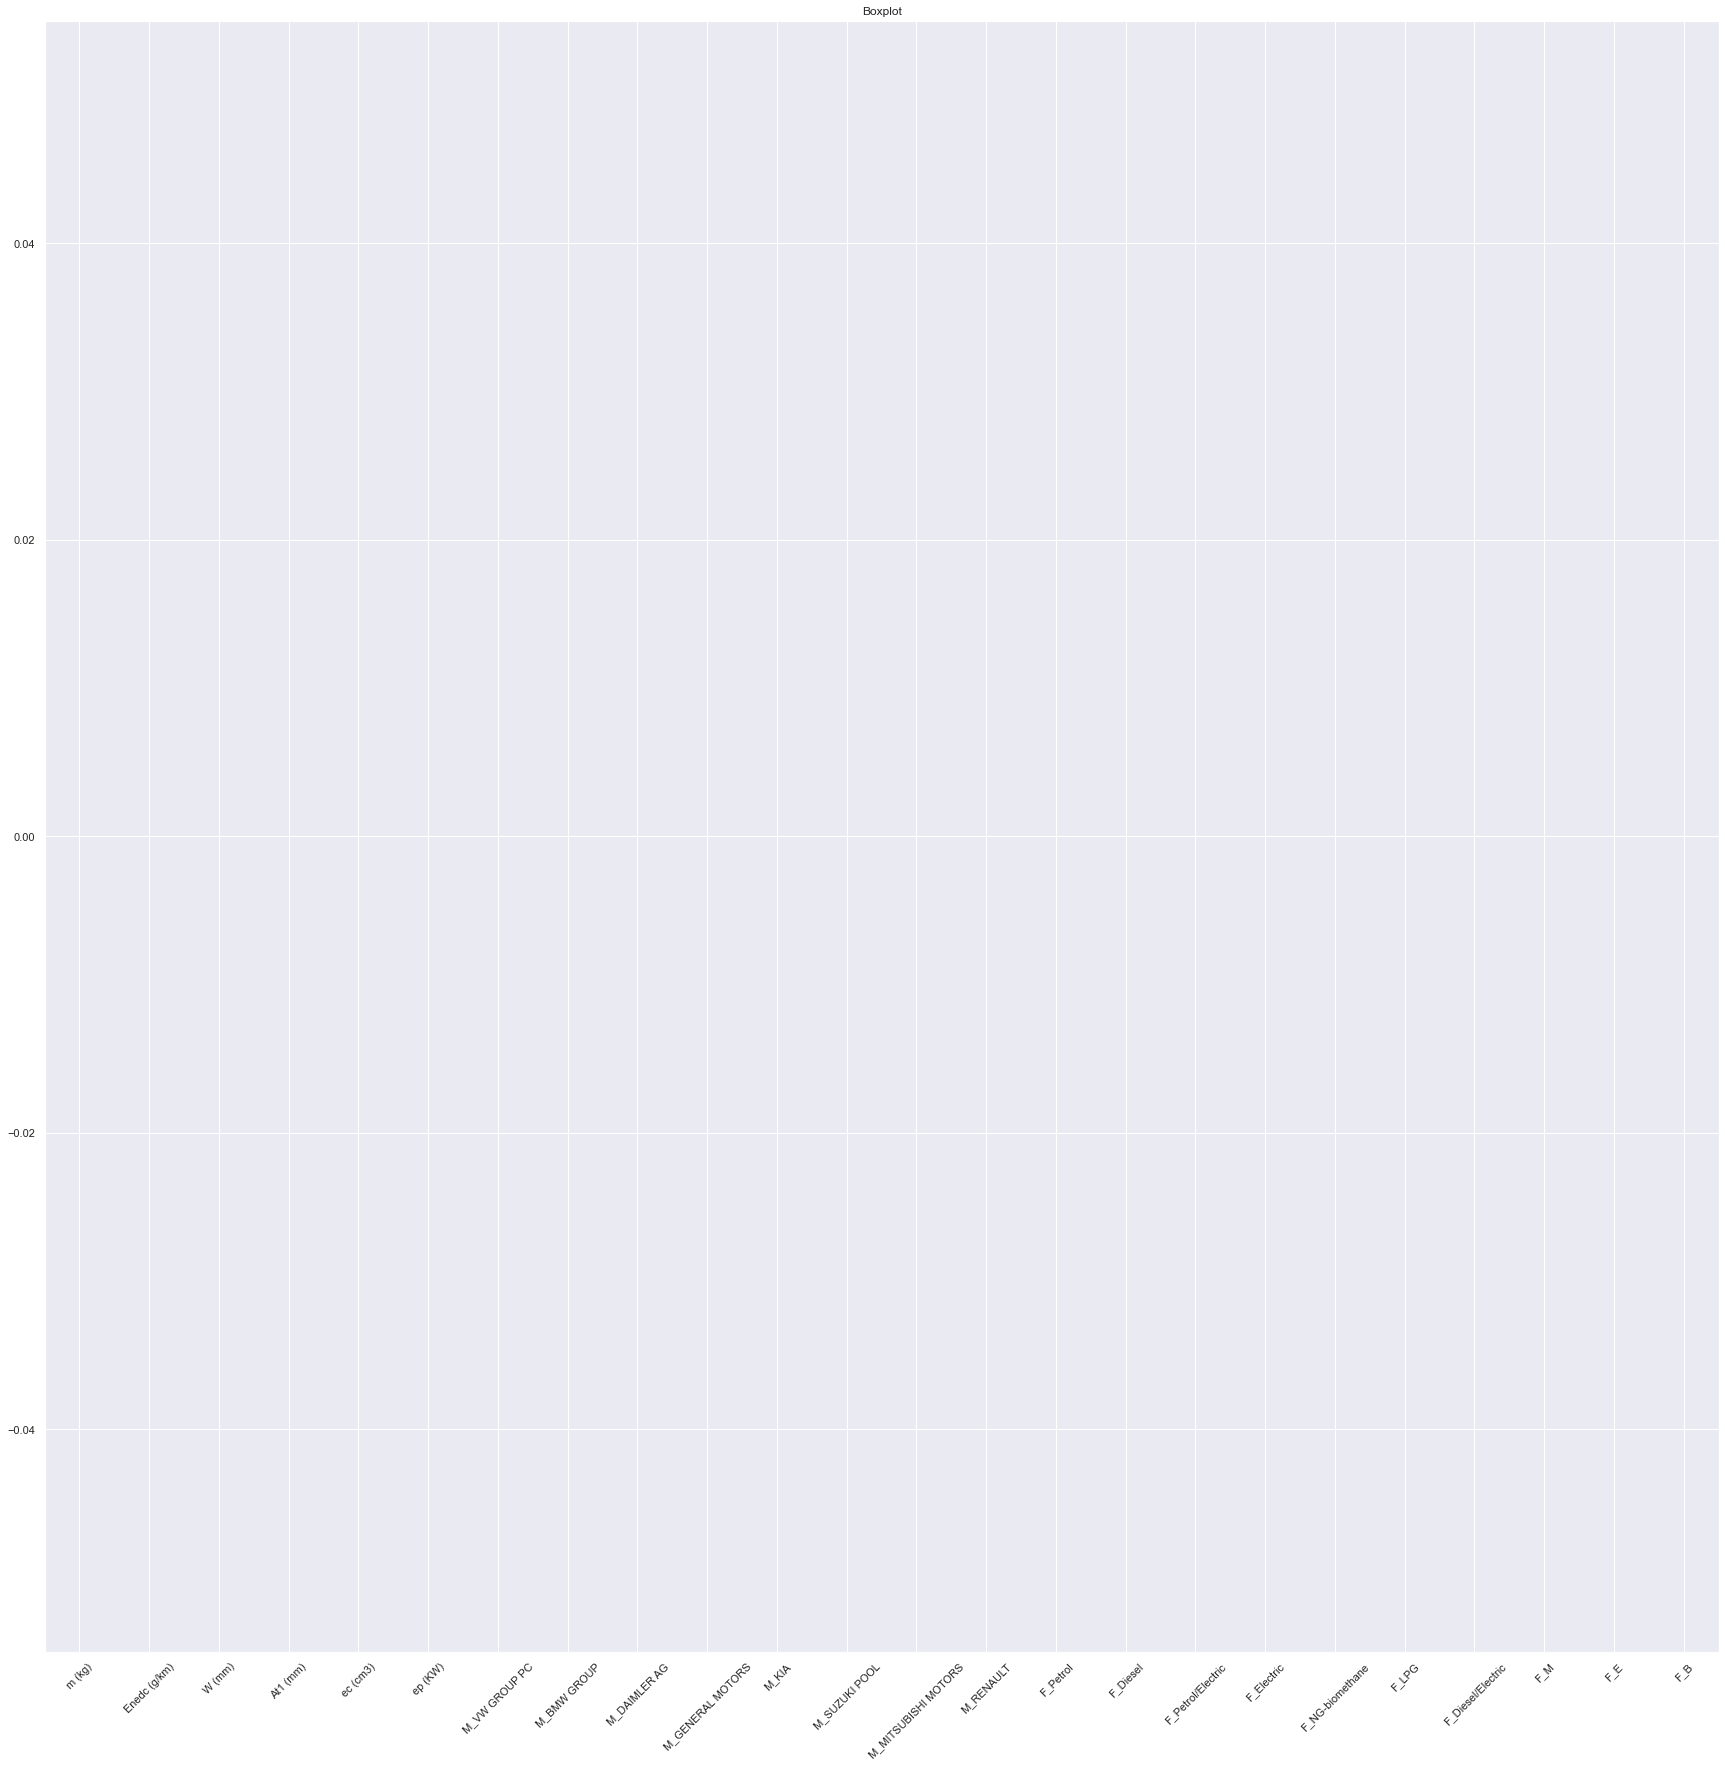

In [107]:
plt.figure(figsize=(30,30))
plt.title("Boxplot")
plt.boxplot(CO2_prep_enc,labels=CO2_prep_enc.columns,medianprops=dict(color="#1ACC94"))
plt.xticks(rotation=45)
plt.show()

In [116]:
# KORRELATION/ABHÄNGIGKEITEN DER WERTE

In [108]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = CO2_prep_enc.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['m (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)', 'M_VW GROUP PC', 'M_BMW GROUP', 'M_DAIMLER AG', 'M_GENERAL MOTORS', 'M_KIA', 'M_SUZUKI POOL', 'M_MITSUBISHI MOTORS', 'M_RENAULT', 'F_Petrol', 'F_Diesel', 'F_Petrol/Electric', 'F_Electric', 'F_NG-biomethane', 'F_LPG', 'F_Diesel/Electric', 'F_M', 'F_E', 'F_B']


/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_VW GROUP PC for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_GENERAL MOTORS for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_KIA for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable F_Diesel for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable F_Petrol/Electric for analysis 1. Dropping this column
  warnings.warn(
/Users/vicr

m (kg)  Enedc (g/km)  W (mm)  At1 (mm)  ec (cm3)  \
m (kg)                 1.00          0.51    0.67      0.84      0.72   
Enedc (g/km)           0.51          1.00    0.36      0.44      0.80   
W (mm)                 0.67          0.36    1.00      0.74      0.50   
At1 (mm)               0.84          0.44    0.74      1.00      0.56   
ec (cm3)               0.72          0.80    0.50      0.56      1.00   
ep (KW)                0.39          0.75    0.24      0.30      0.83   
M_BMW GROUP            0.35          0.25    0.20      0.36      0.06   
M_DAIMLER AG           0.47          0.16    0.24      0.26      0.24   
M_SUZUKI POOL          0.00          0.47    0.07      0.37      0.34   
M_MITSUBISHI MOTORS    0.17          0.00    0.04      0.00      0.23   
M_RENAULT              0.44          0.41    0.10      0.41      0.07   
F_Petrol               0.19          0.11    0.21      0.00      0.00   
F_LPG                  0.14          0.10    0.19      0.00      0.00   
F_Diesel/Electric      0.14          0.00    0.04      0.00      0.00   

                     ep (KW)  M_BMW GROUP  M_DAIMLER AG  M_SUZUKI POOL  \
m (kg)                  0.39         0.35          0.47           0.00   
Enedc (g/km)            0.75         0.25          0.16           0.47   
W (mm)                  0.24         0.20          0.24           0.07   
At1 (mm)                0.30         0.36          0.26           0.37   
ec (cm3)                0.83         0.06          0.24           0.34   
ep (KW)                 1.00         0.09          0.16           0.09   
M_BMW GROUP             0.09         1.00          0.44           0.18   
M_DAIMLER AG            0.16         0.44          1.00           0.00   
M_SUZUKI POOL           0.09         0.18          0.00           1.00   
M_MITSUBISHI MOTORS     0.03         0.00          0.00           0.00   
M_RENAULT               0.12         0.91          0.42           0.17   
F_Petrol                0.08         0.13          0.24           0.00   
F_LPG                   0.07         0.11          0.23           0.00   
F_Diesel/Electric       0.03         0.00          0.00           0.00   

                     M_MITSUBISHI MOTORS  M_RENAULT  F_Petrol  F_LPG  \
m (kg)                              0.17       0.44      0.19   0.14   
Enedc (g/km)                        0.00       0.41      0.11   0.10   
W (mm)                              0.04       0.10      0.21   0.19   
At1 (mm)                            0.00       0.41      0.00   0.00   
ec (cm3)                            0.23       0.07      0.00   0.00   
ep (KW)                             0.03       0.12      0.08   0.07   
M_BMW GROUP                         0.00       0.91      0.13   0.11   
M_DAIMLER AG                        0.00       0.42      0.24   0.23   
M_SUZUKI POOL                       0.00       0.17      0.00   0.00   
M_MITSUBISHI MOTORS                 1.00       0.00      0.00   0.00   
M_RENAULT                           0.00       1.00      0.00   0.00   
F_Petrol                            0.00       0.00      1.00   1.00   
F_LPG                               0.00       0.00      1.00   1.00   
F_Diesel/Electric                   0.00       0.00      0.00   0.00   

                     F_Diesel/Electric  
m (kg)                            0.14  
Enedc (g/km)                      0.00  
W (mm)                            0.04  
At1 (mm)                          0.00  
ec (cm3)                          0.00  
ep (KW)                           0.03  
M_BMW GROUP                       0.00  
M_DAIMLER AG                      0.00  
M_SUZUKI POOL                     0.00  
M_MITSUBISHI MOTORS               0.00  
M_RENAULT                         0.00  
F_Petrol                          0.00  
F_LPG                             0.00  
F_Diesel/Electric                 1.00

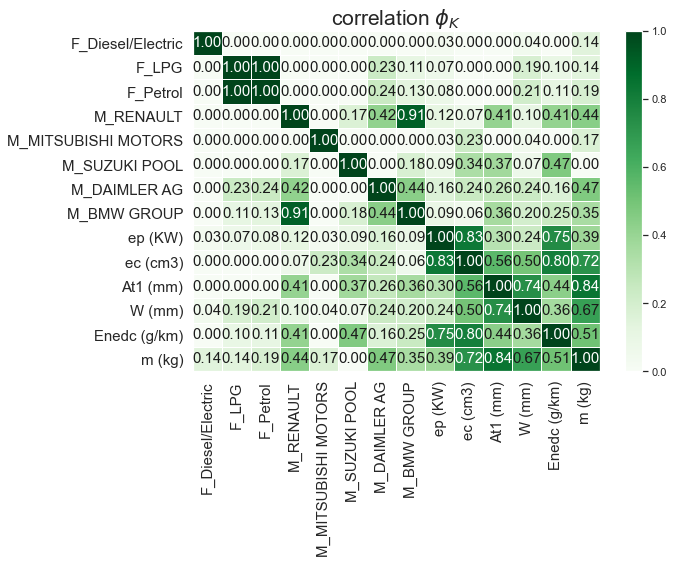

In [109]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

interval columns not set, guessing: ['m (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)', 'M_VW GROUP PC', 'M_BMW GROUP', 'M_DAIMLER AG', 'M_GENERAL MOTORS', 'M_KIA', 'M_SUZUKI POOL', 'M_MITSUBISHI MOTORS', 'M_RENAULT', 'F_Petrol', 'F_Diesel', 'F_Petrol/Electric', 'F_Electric', 'F_NG-biomethane', 'F_LPG', 'F_Diesel/Electric', 'F_M', 'F_E', 'F_B']


/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_VW GROUP PC for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_GENERAL MOTORS for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_KIA for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable F_Diesel for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable F_Petrol/Electric for analysis 1. Dropping this column
  warnings.warn(
/Users/vicr

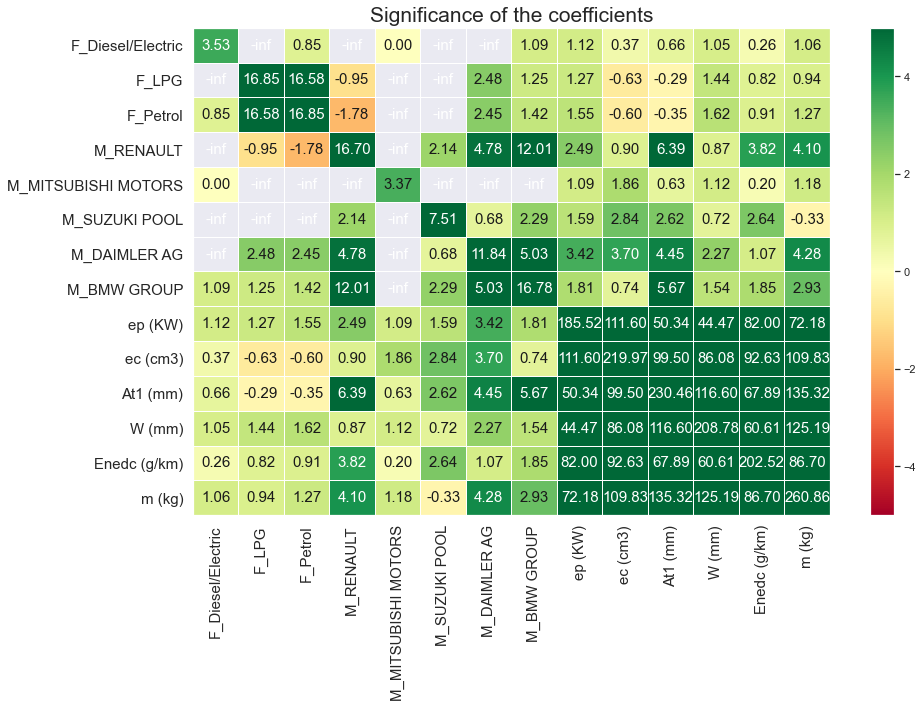

In [110]:
significance_overview = CO2_prep_enc.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

interval columns not set, guessing: ['m (kg)', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)', 'M_VW GROUP PC', 'M_BMW GROUP', 'M_DAIMLER AG', 'M_GENERAL MOTORS', 'M_KIA', 'M_SUZUKI POOL', 'M_MITSUBISHI MOTORS', 'M_RENAULT', 'F_Petrol', 'F_Diesel', 'F_Petrol/Electric', 'F_Electric', 'F_NG-biomethane', 'F_LPG', 'F_Diesel/Electric', 'F_M', 'F_E', 'F_B']


/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_VW GROUP PC for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_GENERAL MOTORS for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable M_KIA for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable F_Diesel for analysis 1. Dropping this column
  warnings.warn(
/Users/vicros/opt/anaconda3/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable F_Petrol/Electric for analysis 1. Dropping this column
  warnings.warn(
/Users/vicr

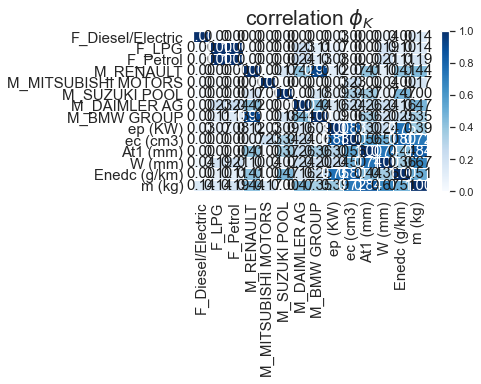

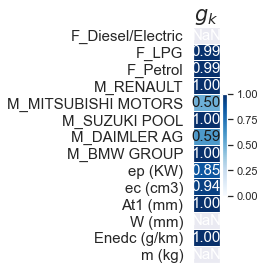

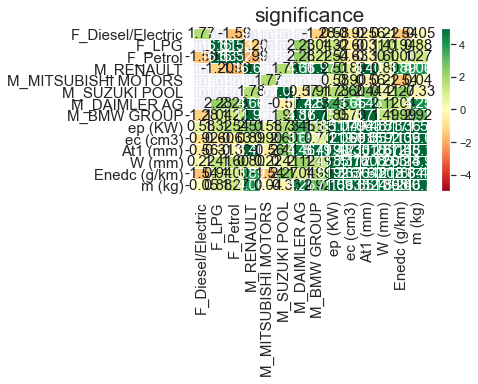

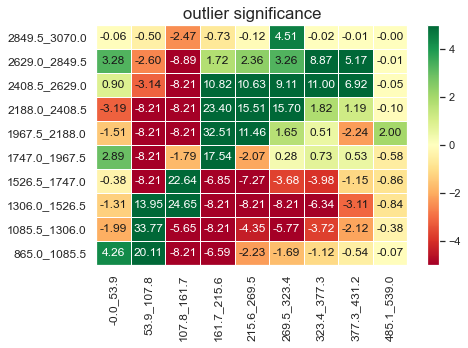

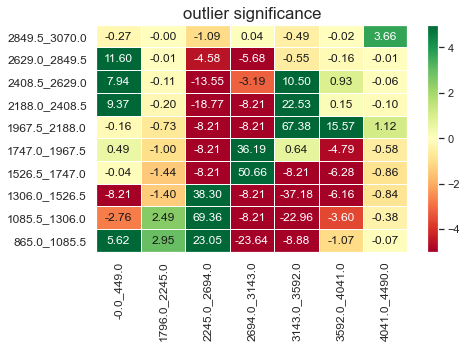

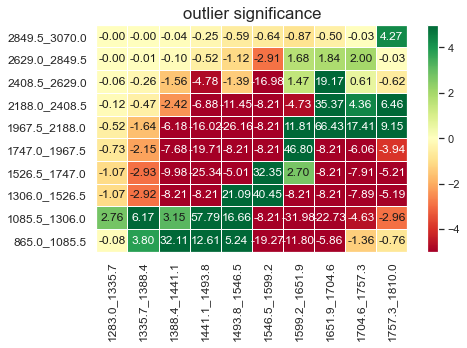

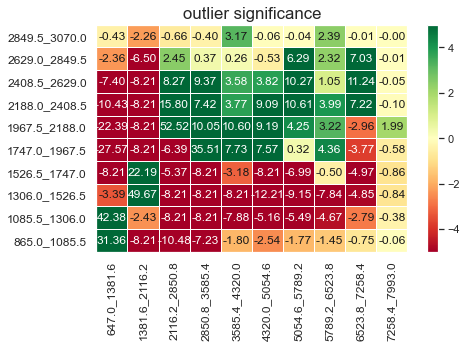

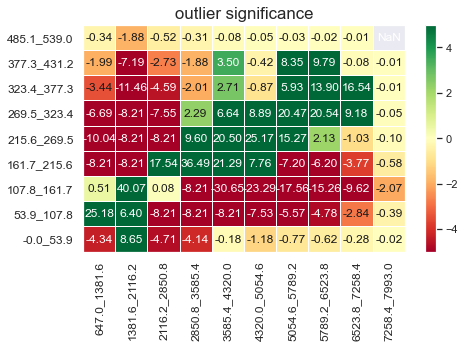

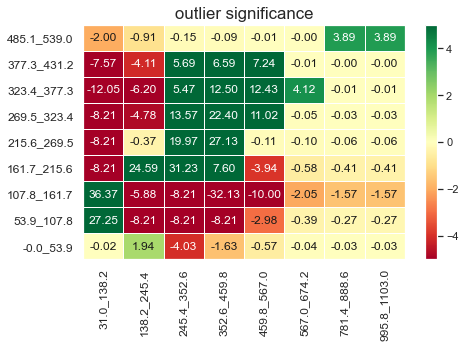

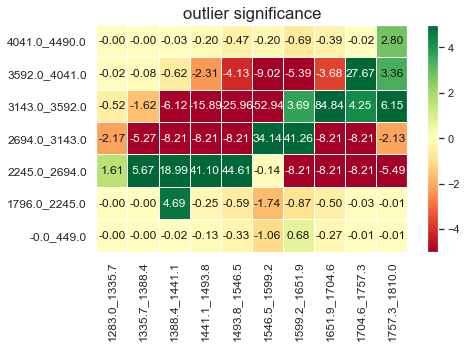

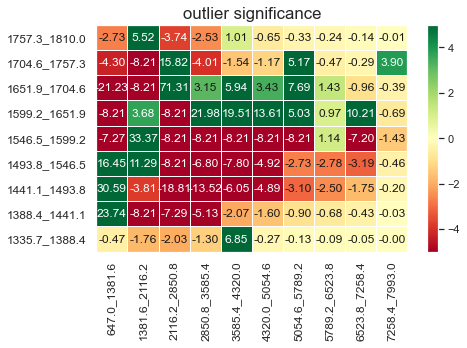

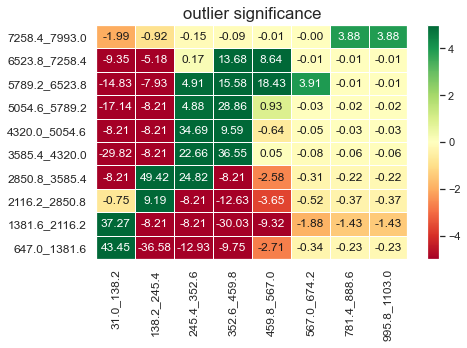

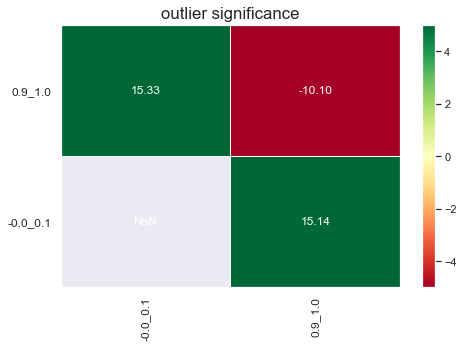

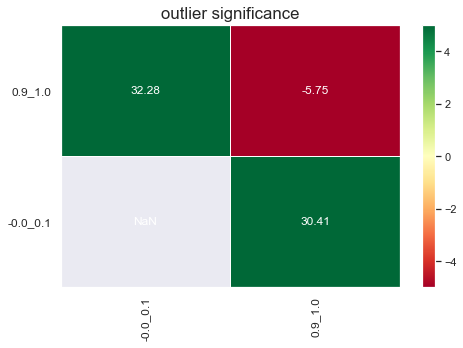

In [111]:
rep = report.correlation_report(CO2_prep_enc, significance_threshold=3, correlation_threshold=0.5)

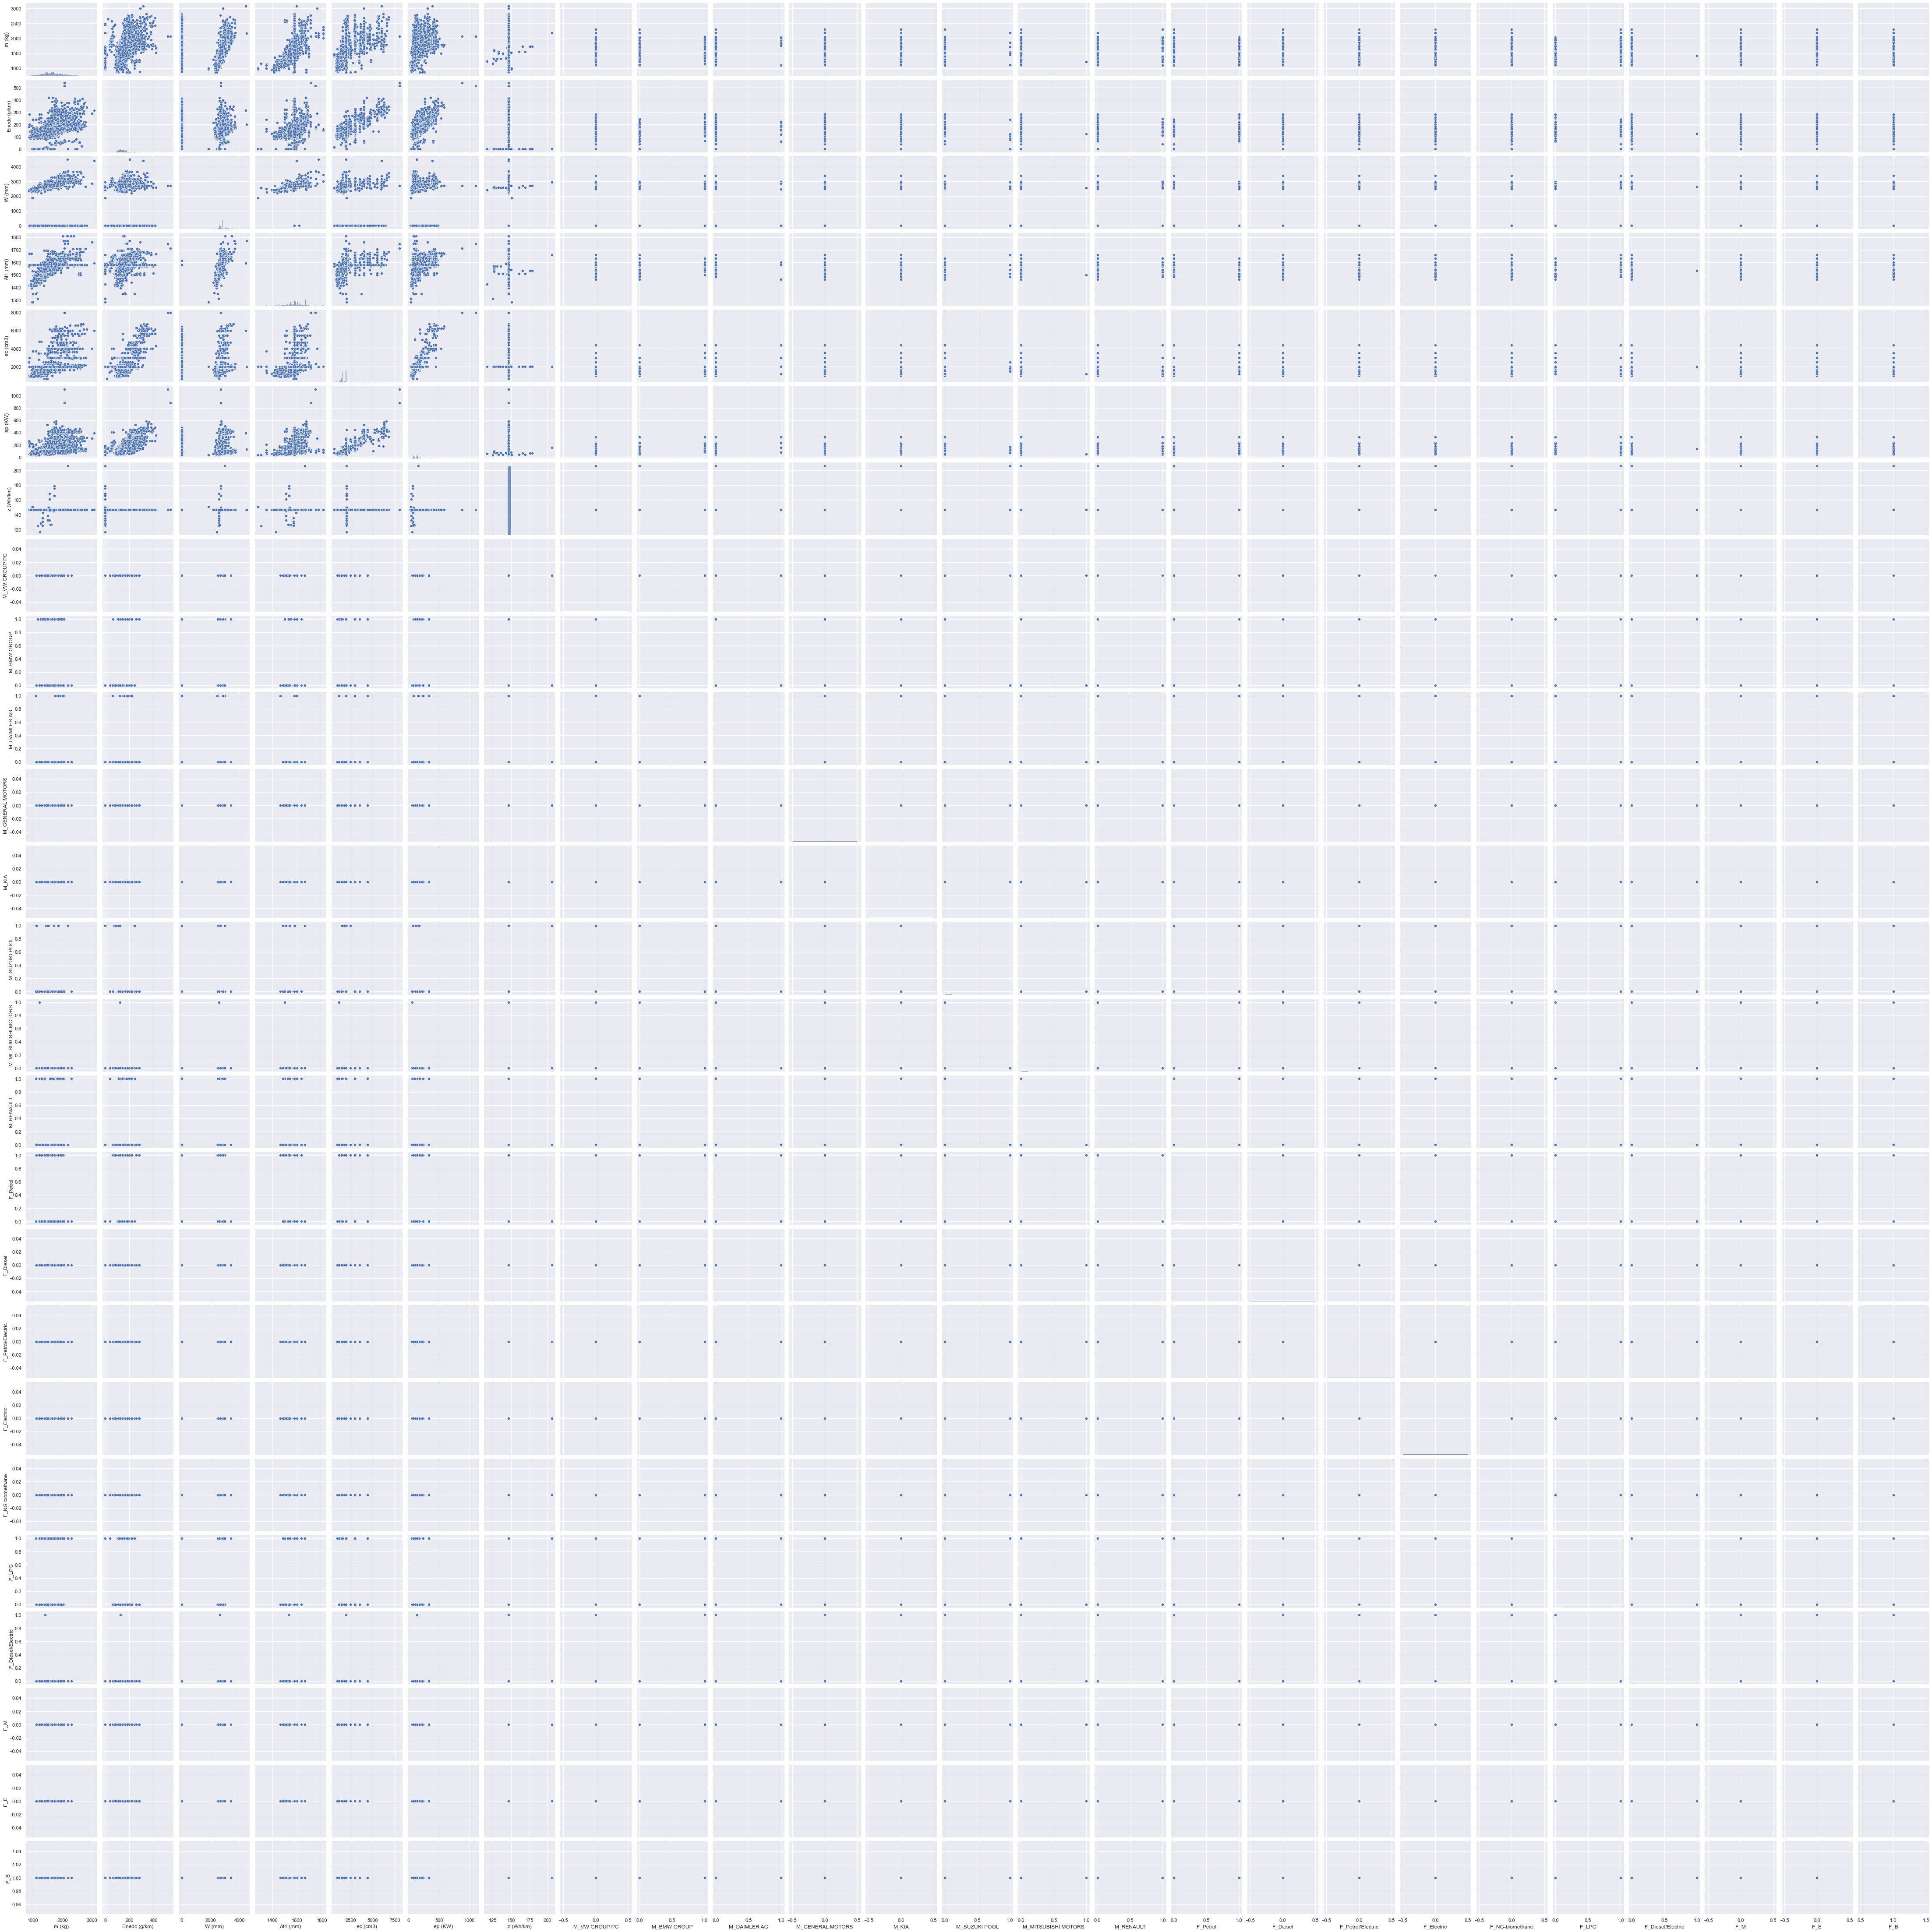

In [119]:
import seaborn as sns
sns.pairplot(CO2_prep_enc)

In [116]:
import ppscore as pps
pps.matrix(CO2_prep_enc)

x                  y   ppscore                case  is_valid_score  \
0    m (kg)             m (kg)  1.000000      predict_itself            True   
1    m (kg)       Enedc (g/km)  0.341354          regression            True   
2    m (kg)             W (mm)  0.155266          regression            True   
3    m (kg)           At1 (mm)  0.654286          regression            True   
4    m (kg)           ec (cm3)  0.454030          regression            True   
..      ...                ...       ...                 ...             ...   
571     F_B              F_LPG  0.000000          regression            True   
572     F_B  F_Diesel/Electric  0.000000          regression            True   
573     F_B                F_M  0.000000  target_is_constant            True   
574     F_B                F_E  0.000000  target_is_constant            True   
575     F_B                F_B  1.000000      predict_itself            True   

                  metric  baseline_score  model_score                    model  
0                   None        0.000000     1.000000                     None  
1    mean absolute error       26.972600    17.765405  DecisionTreeRegressor()  
2    mean absolute error      320.442600   270.688673  DecisionTreeRegressor()  
3    mean absolute error       41.393000    14.310122  DecisionTreeRegressor()  
4    mean absolute error      477.671400   260.794257  DecisionTreeRegressor()  
..                   ...             ...          ...                      ...  
571  mean absolute error        0.460465     0.499299  DecisionTreeRegressor()  
572  mean absolute error        0.004651     0.009278  DecisionTreeRegressor()  
573                 None        1.000000     1.000000                     None  
574                 None        1.000000     1.000000                     None  
575                 None        0.000000     1.000000                     None  

[576 rows x 9 columns]

In [132]:
pps.predictors(CO2_prep_enc, "Enedc (g/km)")

x             y   ppscore        case  is_valid_score  \
0              ec (cm3)  Enedc (g/km)  0.399871  regression            True   
1               ep (KW)  Enedc (g/km)  0.398360  regression            True   
2              At1 (mm)  Enedc (g/km)  0.352734  regression            True   
3                m (kg)  Enedc (g/km)  0.341354  regression            True   
4                W (mm)  Enedc (g/km)  0.301589  regression            True   
5             M_RENAULT  Enedc (g/km)  0.009016  regression            True   
6         M_SUZUKI POOL  Enedc (g/km)  0.004662  regression            True   
7         M_VW GROUP PC  Enedc (g/km)  0.000000  regression            True   
8           M_BMW GROUP  Enedc (g/km)  0.000000  regression            True   
9          M_DAIMLER AG  Enedc (g/km)  0.000000  regression            True   
10     M_GENERAL MOTORS  Enedc (g/km)  0.000000  regression            True   
11                M_KIA  Enedc (g/km)  0.000000  regression            True   
12  M_MITSUBISHI MOTORS  Enedc (g/km)  0.000000  regression            True   
13             F_Petrol  Enedc (g/km)  0.000000  regression            True   
14             F_Diesel  Enedc (g/km)  0.000000  regression            True   
15    F_Petrol/Electric  Enedc (g/km)  0.000000  regression            True   
16           F_Electric  Enedc (g/km)  0.000000  regression            True   
17      F_NG-biomethane  Enedc (g/km)  0.000000  regression            True   
18                F_LPG  Enedc (g/km)  0.000000  regression            True   
19    F_Diesel/Electric  Enedc (g/km)  0.000000  regression            True   
20                  F_M  Enedc (g/km)  0.000000  regression            True   
21                  F_E  Enedc (g/km)  0.000000  regression            True   
22                  F_B  Enedc (g/km)  0.000000  regression            True   

                 metric  baseline_score  model_score                    model  
0   mean absolute error        26.73920    16.046969  DecisionTreeRegressor()  
1   mean absolute error        27.63680    16.627391  DecisionTreeRegressor()  
2   mean absolute error        25.46120    16.480178  DecisionTreeRegressor()  
3   mean absolute error        26.97260    17.765405  DecisionTreeRegressor()  
4   mean absolute error        27.94820    19.519317  DecisionTreeRegressor()  
5   mean absolute error        30.12093    29.849366  DecisionTreeRegressor()  
6   mean absolute error        30.12093    29.980492  DecisionTreeRegressor()  
7   mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
8   mean absolute error        30.12093    30.389956  DecisionTreeRegressor()  
9   mean absolute error        30.12093    30.312035  DecisionTreeRegressor()  
10  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
11  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
12  mean absolute error        30.12093    30.824815  DecisionTreeRegressor()  
13  mean absolute error        30.12093    30.644526  DecisionTreeRegressor()  
14  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
15  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
16  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
17  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
18  mean absolute error        30.12093    30.713778  DecisionTreeRegressor()  
19  mean absolute error        30.12093    30.815557  DecisionTreeRegressor()  
20  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
21  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()  
22  mean absolute error        30.12093    30.809075  DecisionTreeRegressor()

<AxesSubplot:xlabel='x', ylabel='y'>

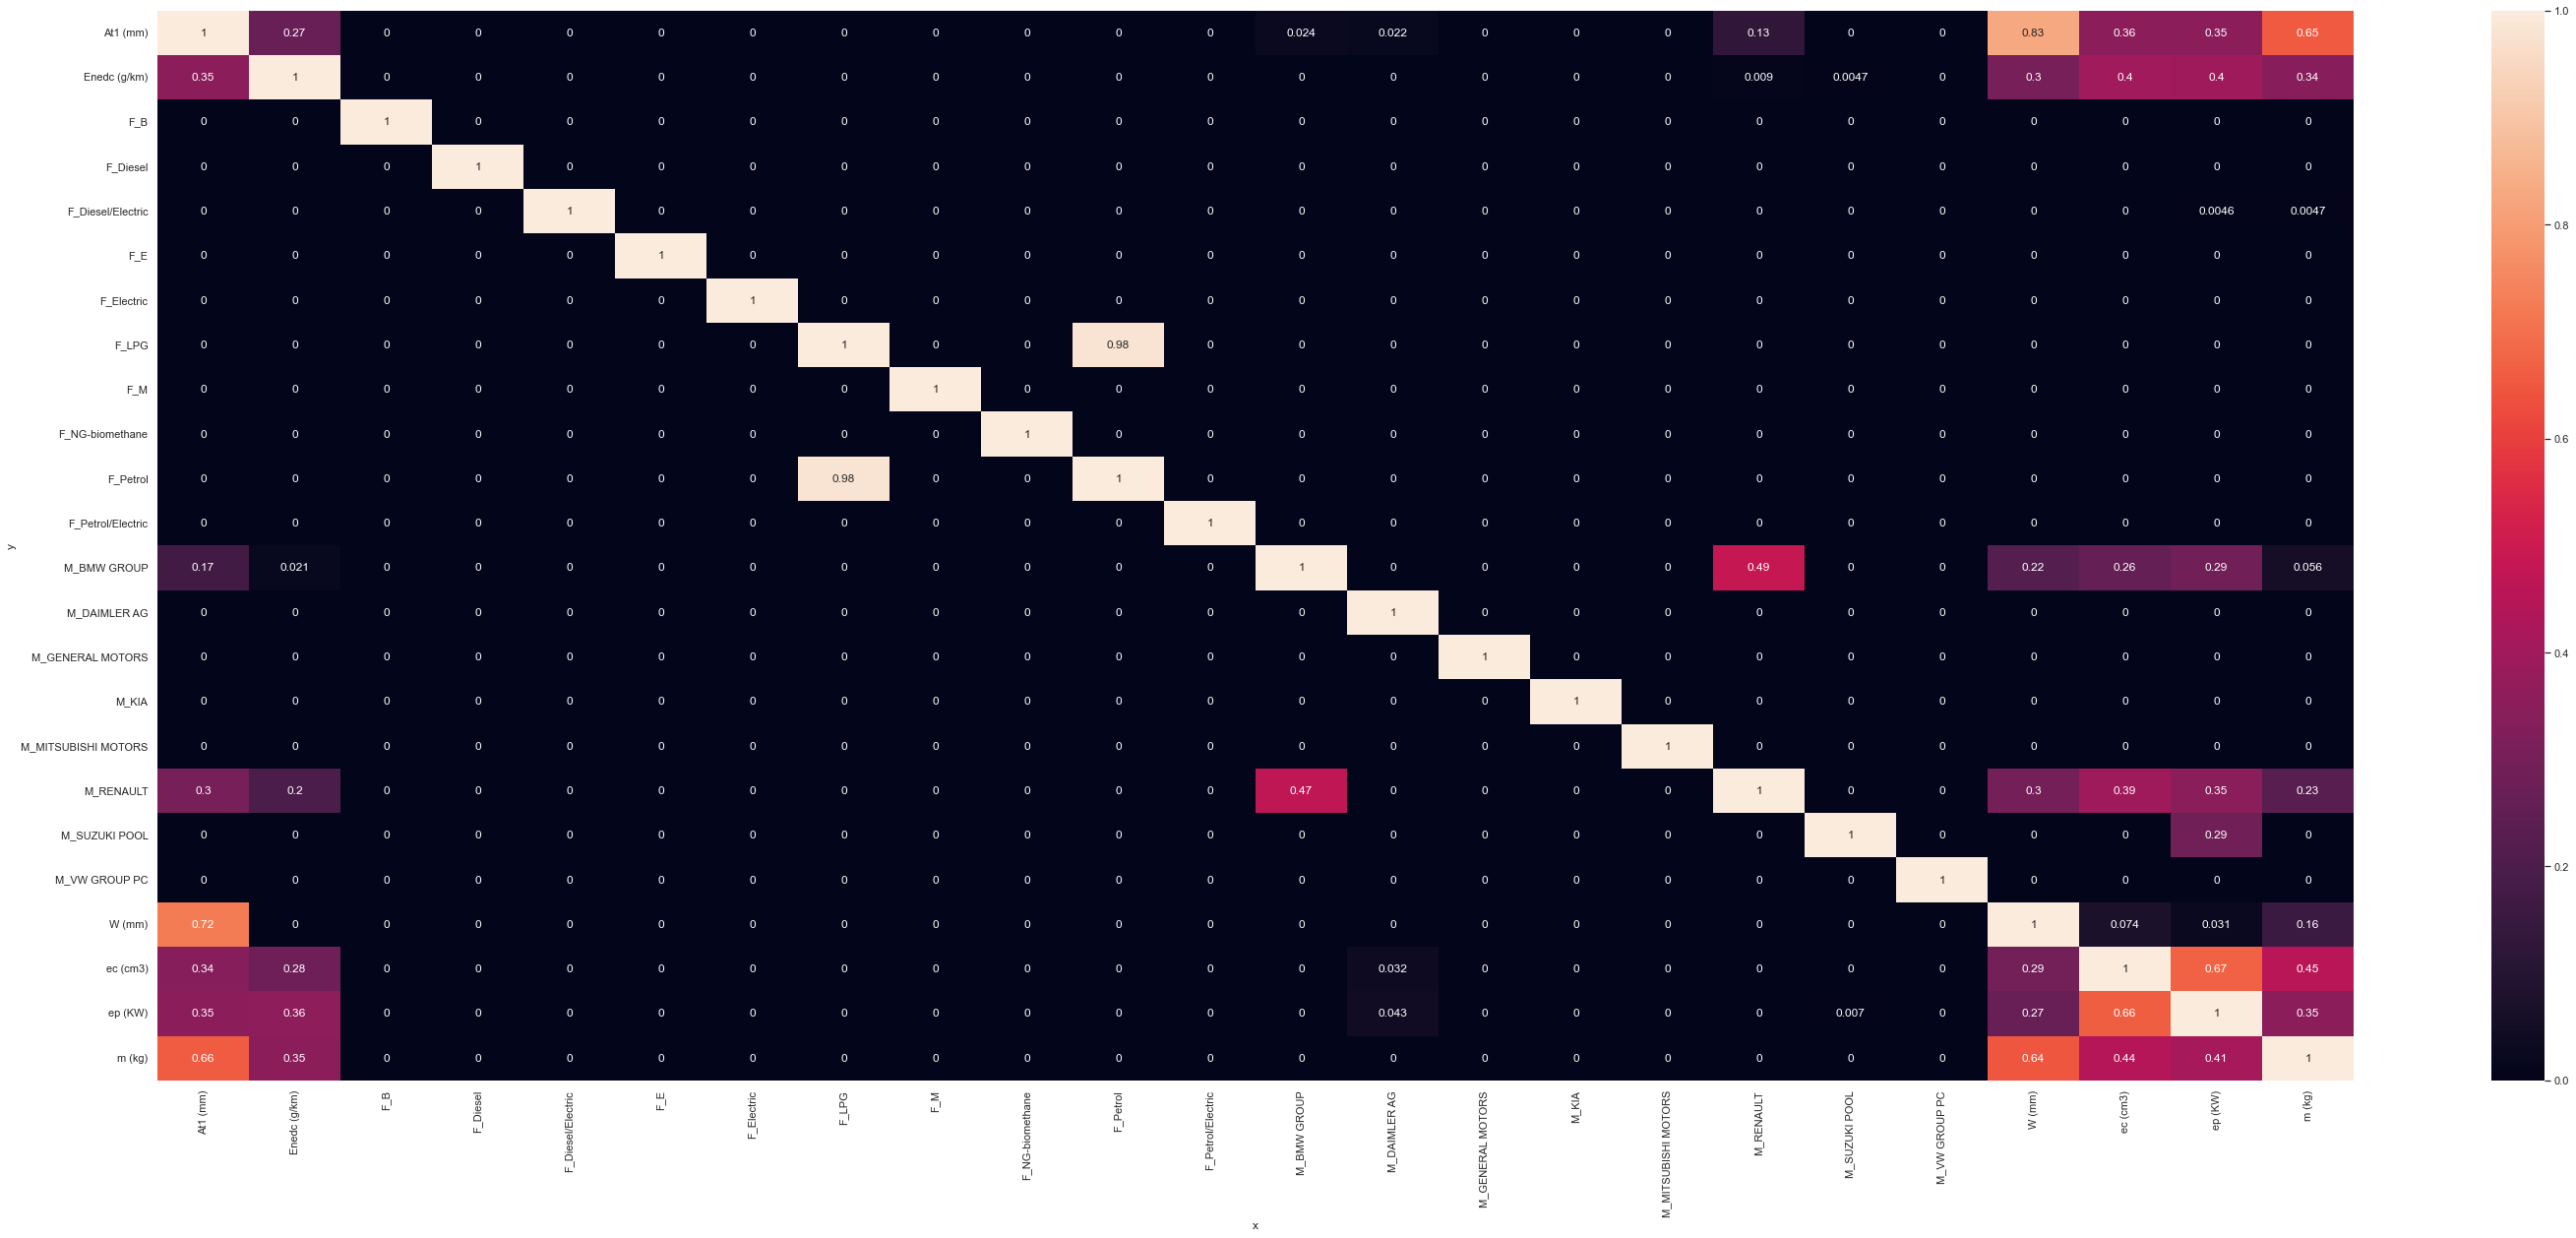

In [133]:
matrix_df = pps.matrix(CO2_prep_enc).pivot(columns='x', index='y',  values='ppscore')

sns.heatmap(matrix_df, annot=True)

In [41]:
CO2_prep_enc.corr()

m (kg)  Enedc (g/km)    W (mm)  At1 (mm)  ec (cm3)  \
m (kg)               1.000000      0.567975  0.156631  0.779625  0.587769   
Enedc (g/km)         0.567975      1.000000 -0.061528  0.409650  0.723200   
W (mm)               0.156631     -0.061528  1.000000  0.253653  0.004244   
At1 (mm)             0.779625      0.409650  0.253653  1.000000  0.399091   
ec (cm3)             0.587769      0.723200  0.004244  0.399091  1.000000   
ep (KW)              0.491249      0.708293 -0.037102  0.338447  0.894294   
M_VW GROUP PC             NaN           NaN       NaN       NaN       NaN   
M_BMW GROUP         -0.003030      0.188458 -0.129430  0.275690 -0.064419   
M_DAIMLER AG         0.265016      0.140975  0.075708  0.212003  0.304954   
M_GENERAL MOTORS          NaN           NaN       NaN       NaN       NaN   
M_KIA                     NaN           NaN       NaN       NaN       NaN   
M_SUZUKI POOL       -0.069840     -0.231997 -0.092855 -0.037114 -0.127990   
M_MITSUBISHI MOTORS -0.132857     -0.063107  0.009958 -0.124109 -0.101724   
M_RENAULT           -0.122869     -0.187618  0.114028 -0.382677 -0.069926   
F_Petrol             0.041042      0.096263 -0.123741  0.001708  0.030535   
F_Diesel                  NaN           NaN       NaN       NaN       NaN   
F_Petrol/Electric         NaN           NaN       NaN       NaN       NaN   
F_Electric                NaN           NaN       NaN       NaN       NaN   
F_NG-biomethane           NaN           NaN       NaN       NaN       NaN   
F_LPG               -0.029987     -0.088654  0.121910  0.007370 -0.024938   
F_Diesel/Electric   -0.081190     -0.056228  0.014048 -0.066508 -0.041158   
F_M                       NaN           NaN       NaN       NaN       NaN   
F_E                       NaN           NaN       NaN       NaN       NaN   
F_B                       NaN           NaN       NaN       NaN       NaN   

                      ep (KW)  M_VW GROUP PC  M_BMW GROUP  M_DAIMLER AG  \
m (kg)               0.491249            NaN    -0.003030      0.265016   
Enedc (g/km)         0.708293            NaN     0.188458      0.140975   
W (mm)              -0.037102            NaN    -0.129430      0.075708   
At1 (mm)             0.338447            NaN     0.275690      0.212003   
ec (cm3)             0.894294            NaN    -0.064419      0.304954   
ep (KW)              1.000000            NaN    -0.100730      0.298590   
M_VW GROUP PC             NaN            NaN          NaN           NaN   
M_BMW GROUP         -0.100730            NaN     1.000000     -0.312435   
M_DAIMLER AG         0.298590            NaN    -0.312435      1.000000   
M_GENERAL MOTORS          NaN            NaN          NaN           NaN   
M_KIA                     NaN            NaN          NaN           NaN   
M_SUZUKI POOL       -0.195385            NaN    -0.161692     -0.065029   
M_MITSUBISHI MOTORS -0.120945            NaN    -0.060251     -0.024232   
M_RENAULT           -0.002348            NaN    -0.740766     -0.297919   
F_Petrol             0.038848            NaN    -0.118040      0.182492   
F_Diesel                  NaN            NaN          NaN           NaN   
F_Petrol/Electric         NaN            NaN          NaN           NaN   
F_Electric                NaN            NaN          NaN           NaN   
F_NG-biomethane           NaN            NaN          NaN           NaN   
F_LPG               -0.032447            NaN     0.107535     -0.179312   
F_Diesel/Electric   -0.047088            NaN     0.077557     -0.024232   
F_M                       NaN            NaN          NaN           NaN   
F_E                       NaN            NaN          NaN           NaN   
F_B                       NaN            NaN          NaN           NaN   

                     M_GENERAL MOTORS  ...  F_Petrol  F_Diesel  \
m (kg)                            NaN  ...  0.041042       NaN   
Enedc (g/km)                      NaN  ...  0.096263       NaN   
W (mm)                 

In [128]:
corr_heatmap(CO2_prep_enc.corr())

NameError: name 'corr_heatmap' is not defined

In [60]:
to_plot = ["m (kg)", "W (mm)", "At1 (mm)", 'ec (cm3)', 'ep (KW)',
       'M_VW GROUP PC', 'M_BMW GROUP', 'M_DAIMLER AG', 'M_GENERAL MOTORS',
       'M_KIA', 'M_SUZUKI POOL', 'M_MITSUBISHI MOTORS', 'M_RENAULT',
       'F_Petrol', 'F_Diesel', 'F_Petrol/Electric', 'F_Electric',
       'F_NG-biomethane', 'F_LPG', 'F_Diesel/Electric', 'F_M', 'F_E', 'F_B']

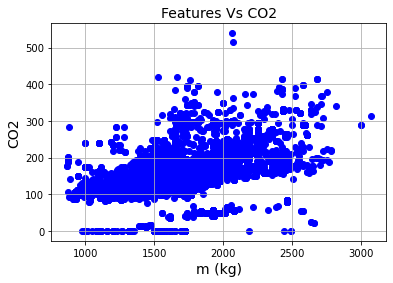

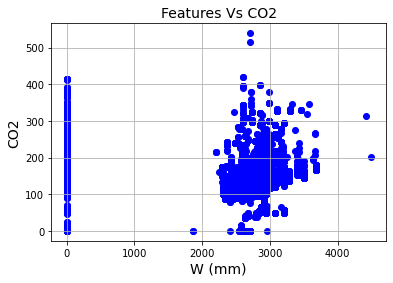

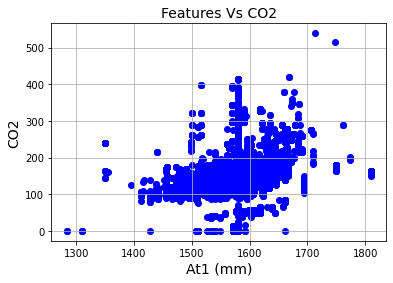

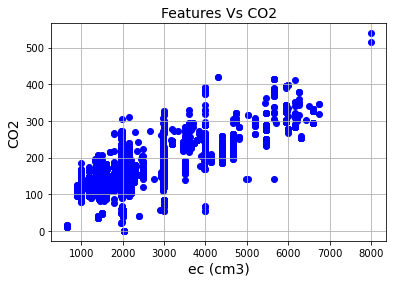

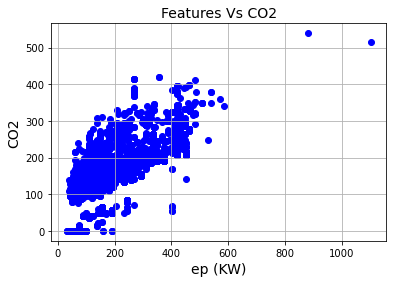

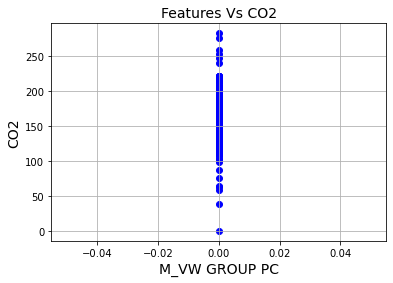

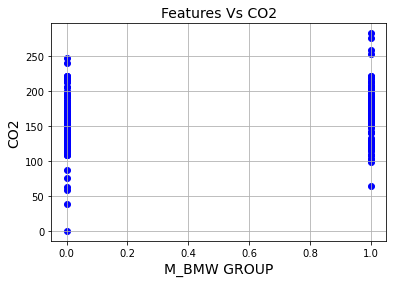

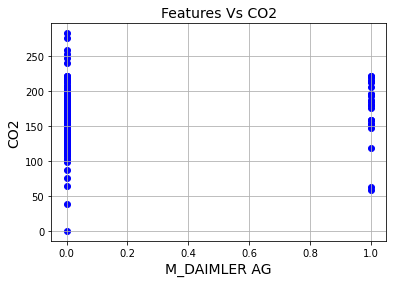

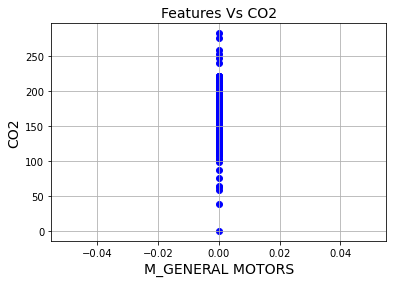

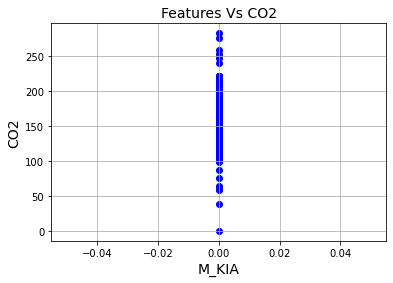

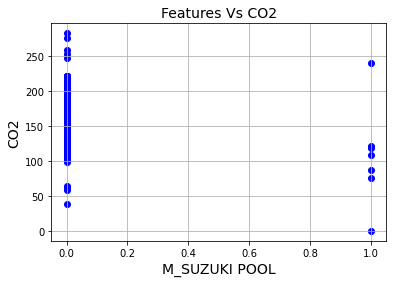

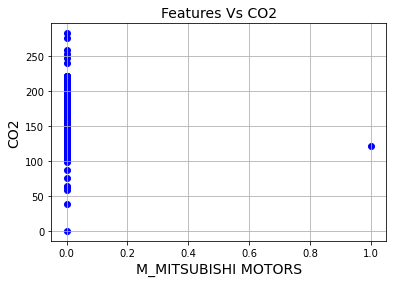

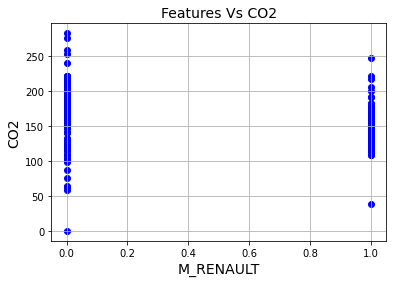

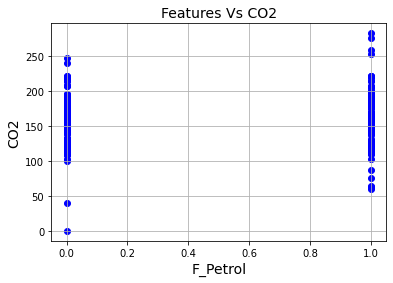

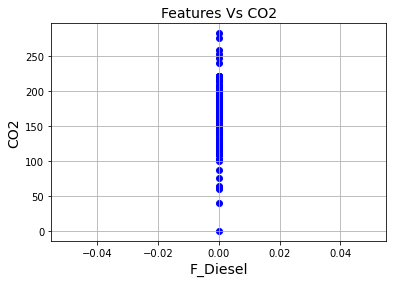

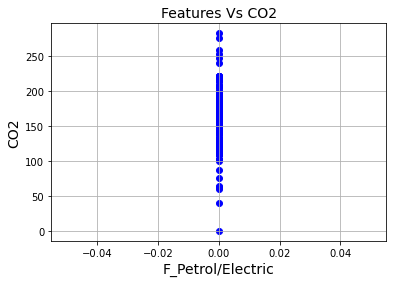

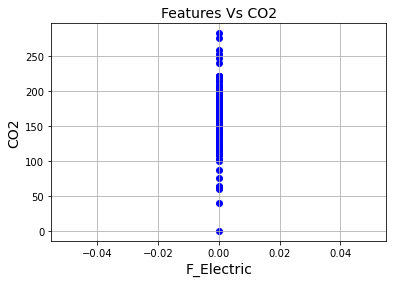

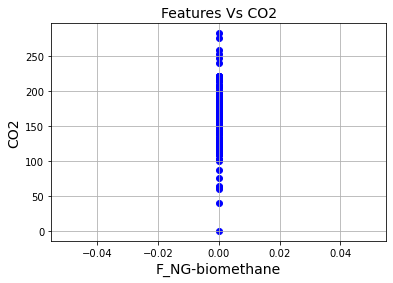

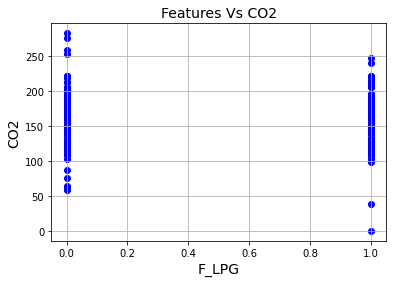

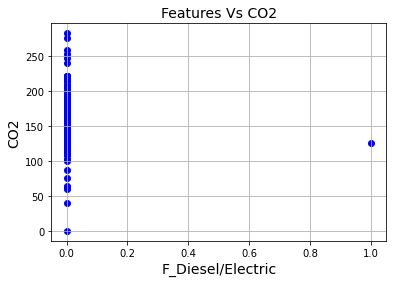

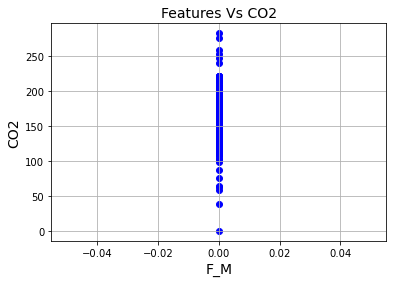

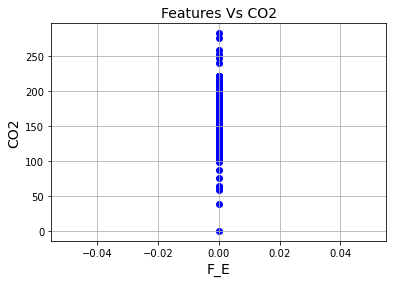

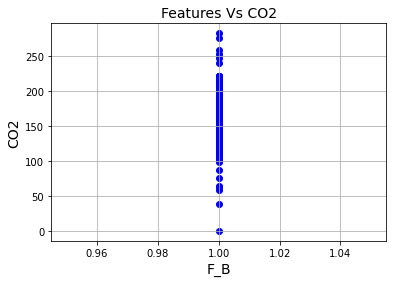

In [62]:
for feature in to_plot:
    plt.scatter(CO2_prep_enc[feature], CO2_prep_enc['Enedc (g/km)'], color='blue')
    plt.title('Features Vs CO2', fontsize=14)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('CO2', fontsize=14)
    plt.grid(True)
    plt.show()

In [63]:
to_plot2 = ["m (kg)", "W (mm)", "At1 (mm)", 'ec (cm3)', 'ep (KW)', "Mp", 'Mk', 'Ft', 'Fm']

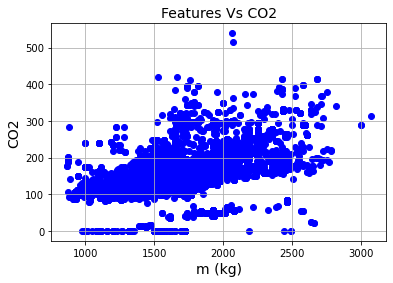

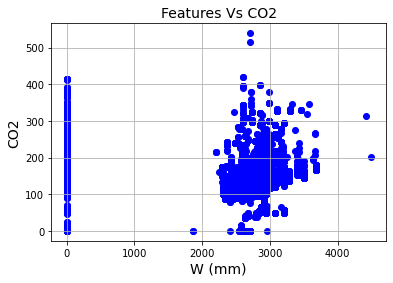

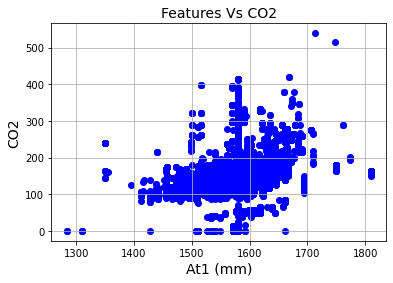

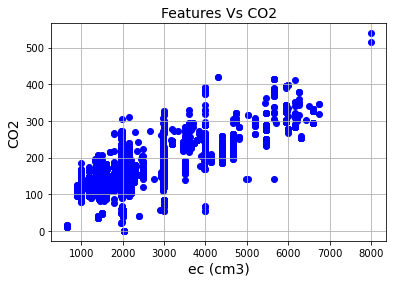

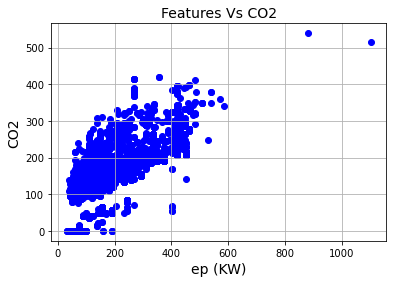

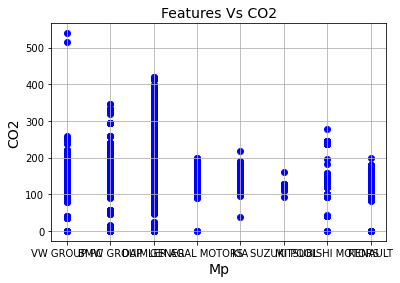

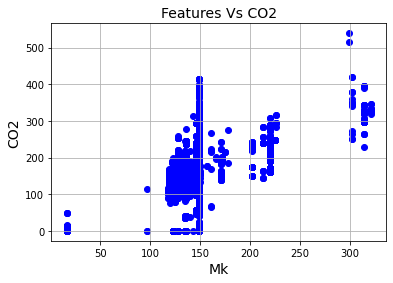

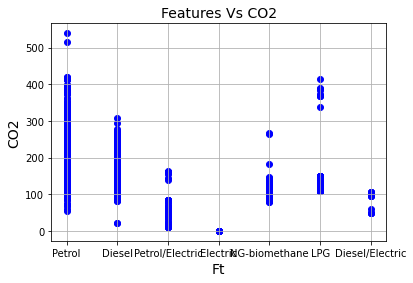

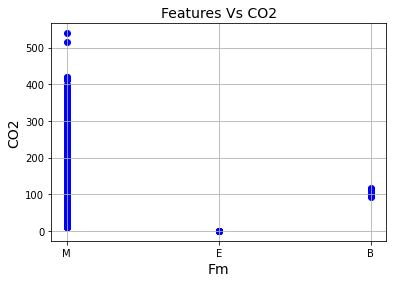

In [64]:
for feature in to_plot2:
    plt.scatter(CO2_raw_final[feature], CO2_raw_final['Enedc (g/km)'], color='blue')
    plt.title('Features Vs CO2', fontsize=14)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('CO2', fontsize=14)
    plt.grid(True)
    plt.show()

In [ ]:
# 3. MODELE TRAINIEREN

In [ ]:
# A. Splitten in Test und Train Daten

In [42]:
X = CO2_prep_enc.drop(["Enedc (g/km)"],axis=1)
y = CO2_prep_enc["Enedc (g/km)"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X , y)
print('X Train: {}'.format(X_train.shape)) 
print('Y Train: {}'.format(y_train.shape)) 
print('X Test: {}'.format(X_test.shape)) 
print('Y Test: {}'.format(y_test.shape))

X Train: (14700, 23)
Y Train: (14700,)
X Test: (4900, 23)
Y Test: (4900,)


In [44]:
def check_nan_inf(X_test):
    for col in X_test.columns:
        if X_test[col].isnull().any():
            print(col, 'has nan')
        if np.isinf(X_test[col]).any():
            print(col, 'has inf')

In [45]:
check_nan_inf(X_test)

M_VW GROUP PC has nan
M_BMW GROUP has nan
M_DAIMLER AG has nan
M_GENERAL MOTORS has nan
M_KIA has nan
M_SUZUKI POOL has nan
M_MITSUBISHI MOTORS has nan
M_RENAULT has nan
F_Petrol has nan
F_Diesel has nan
F_Petrol/Electric has nan
F_Electric has nan
F_NG-biomethane has nan
F_LPG has nan
F_Diesel/Electric has nan
F_M has nan
F_E has nan
F_B has nan


In [146]:
from sklearn.preprocessing import MinMaxScaler

In [147]:
to_scale = ['m (kg)','W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)']

for feature in to_scale:
    minmax = MinMaxScaler()
    X_train[feature] = minmax.fit_transform(X_train[feature].to_numpy().reshape(-1,1))
    X_test[feature] = minmax.fit_transform(X_test[feature].to_numpy().reshape(-1,1))

/var/folders/5v/x5bgf8yj34q8c1bw3hrcktcm0000gn/T/ipykernel_766/964381957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = minmax.fit_transform(X_train[feature].to_numpy().reshape(-1,1))
/var/folders/5v/x5bgf8yj34q8c1bw3hrcktcm0000gn/T/ipykernel_766/964381957.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = minmax.fit_transform(X_test[feature].to_numpy().reshape(-1,1))
/var/folders/5v/x5bgf8yj34q8c1bw3hrcktcm0000gn/T/ipykernel_766/964381957.py:5: SettingWithCopyWarn

In [150]:
X_test.head()

m (kg)    W (mm)  At1 (mm)  ec (cm3)   ep (KW)  M_VW GROUP PC  \
448328  0.543814  0.654566     0.590  0.395122  0.517647            NaN   
630378  0.268041  0.595768     0.570  0.153574  0.111765            NaN   
573238  0.432474  0.600223     0.554  0.120606  0.141176            NaN   
163884  0.663402  0.757238     0.648  0.222204  0.233333            NaN   
286184  0.136598  0.547216     0.292  0.059209  0.076471            NaN   

        M_BMW GROUP  M_DAIMLER AG  M_GENERAL MOTORS  M_KIA  ...  F_Petrol  \
448328          NaN           NaN               NaN    NaN  ...       NaN   
630378          NaN           NaN               NaN    NaN  ...       NaN   
573238          NaN           NaN               NaN    NaN  ...       NaN   
163884          NaN           NaN               NaN    NaN  ...       NaN   
286184          NaN           NaN               NaN    NaN  ...       NaN   

        F_Diesel  F_Petrol/Electric  F_Electric  F_NG-biomethane  F_LPG  \
448328       NaN                NaN         NaN              NaN    NaN   
630378       NaN                NaN         NaN              NaN    NaN   
573238       NaN                NaN         NaN              NaN    NaN   
163884       NaN                NaN         NaN              NaN    NaN   
286184       NaN                NaN         NaN              NaN    NaN   

        F_Diesel/Electric  F_M  F_E  F_B  
448328                NaN  NaN  NaN  NaN  
630378                NaN  NaN  NaN  NaN  
573238                NaN  NaN  NaN  NaN  
163884                NaN  NaN  NaN  NaN  
286184                NaN  NaN  NaN  NaN  

[5 rows x 23 columns]

In [151]:
X_train.head()

m (kg)    W (mm)  At1 (mm)  ec (cm3)   ep (KW)  M_VW GROUP PC  \
1033166  0.180499  0.592576  0.504744  0.101824  0.073694            NaN   
503948   0.370975  0.640335  0.614801  0.183910  0.149254            NaN   
1037422  0.136961  0.000000       NaN  0.047917  0.032649            NaN   
466159   0.442177  0.665233  0.599620  0.177375  0.104478            NaN   
254578   0.285714  0.642825  0.578748  0.182957  0.097015            NaN   

         M_BMW GROUP  M_DAIMLER AG  M_GENERAL MOTORS  M_KIA  ...  F_Petrol  \
1033166          NaN           NaN               NaN    NaN  ...       NaN   
503948           NaN           NaN               NaN    NaN  ...       NaN   
1037422          NaN           NaN               NaN    NaN  ...       NaN   
466159           NaN           NaN               NaN    NaN  ...       NaN   
254578           NaN           NaN               NaN    NaN  ...       NaN   

         F_Diesel  F_Petrol/Electric  F_Electric  F_NG-biomethane  F_LPG  \
1033166       NaN                NaN         NaN              NaN    NaN   
503948        NaN                NaN         NaN              NaN    NaN   
1037422       NaN                NaN         NaN              NaN    NaN   
466159        NaN                NaN         NaN              NaN    NaN   
254578        NaN                NaN         NaN              NaN    NaN   

         F_Diesel/Electric  F_M  F_E  F_B  
1033166                NaN  NaN  NaN  NaN  
503948                 NaN  NaN  NaN  NaN  
1037422                NaN  NaN  NaN  NaN  
466159                 NaN  NaN  NaN  NaN  
254578                 NaN  NaN  NaN  NaN  

[5 rows x 23 columns]

In [ ]:
# LINEARE REGRESSION

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
fig, axes = plt.subplots(1,len(X_train.columns.values),sharey=True,constrained_layout=True,figsize=(30,15))

for i,e in enumerate(X_train.columns):
    regressor.fit(X_train[e].values[:,np.newaxis], y.values)
    axes[i].set_title("Best fit line")
    axes[i].set_xlabel(str(e))
    axes[i].set_ylabel('CO2')
    axes[i].scatter(X_train[e].values[:,np.newaxis], y,color='g')
    axes[i].plot(X_train[e].values[:,np.newaxis], 
    regressor.predict(X_train[e].values[:,np.newaxis]),color='k')

In [174]:
y_pred = regressor.predict(X_test)

In [ ]:
# Plot real Werte vs Vorsage 
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [ ]:
# Regression plot 
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [ ]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)
#The r2 score varies between 0 and 100%. It is closely related to the MSE 
# There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. 
#Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

In [ ]:
# Neue Dataframe mit jetzige und vorgesagte Werte und die Unterschiede zwischen beide.
# Gibt mehr Verständnis von Accuracy.
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

In [176]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17.291964694674736
Mean Squared Error: 661.3112967679834
Root Mean Squared Error: 25.715973572236837


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['y'], df['y_predicted'])
print(mse)

In [197]:
# POLINOMIALE REGRESSION

In [177]:
from sklearn.preprocessing import PolynomialFeatures

In [178]:
features = PolynomialFeatures(degree=2)
X = features.fit_transform(X)

In [179]:
X.shape

(19600, 325)

In [180]:
full_polynomial_model = LinearRegression()
full_polynomial_model.fit(X,y)

print("The model explains {:.2f}% of the CO2 specific emission per vehicle.".format(full_polynomial_model.score(X,y)*100))
# googlen

The model explains 68.74% of the CO2 specific emission per vehicle.


ValueError: x and y must be the same size

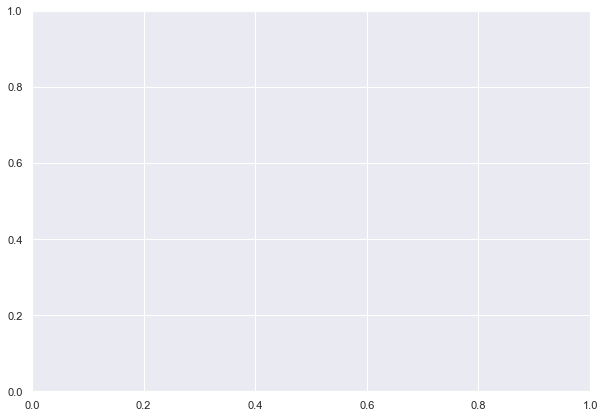

In [181]:
plt.figure(figsize=(10,7))

plt.scatter(X, y, label="Data points")

plt.plot(sorted(X), sorted(predictions.reshape((506,)), reverse=True),
         color='red', lw=2, label="Polynomial Regression model")

plt.xlabel("Variables")
plt.ylabel("Specific CO2 Emission")
plt.legend();

In [ ]:
# SVM und Interpretation

In [182]:
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, VotingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import time
import shap
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'shap'

In [183]:
import warnings
warnings.filterwarnings('ignore')

def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

def train_evaluate_time(method):
    start_time = time.time()
    methods[method].fit(X_train, y_train)
    running_time = round(time.time() - start_time,2)
    model_predict = methods[method].predict(X_test)
    model_mse = mse(model_predict,y_test)
    print("Genauigkeit von {}: {}; running time: {}".format(method, model_mse, running_time))


methods = {"knn": KNeighborsRegressor(), "linregr": LinearRegression(), "tree": DecisionTreeRegressor(), 
           "forest": RandomForestRegressor(), "ada": AdaBoostRegressor(), "svm": svm.SVR()}


for method in methods:
    train_evaluate_time(method)    

Genauigkeit von knn: 163.07341891753777; running time: 0.0
Genauigkeit von linregr: 661.3112967679845; running time: 0.04
Genauigkeit von tree: 149.2889783401735; running time: 0.03
Genauigkeit von forest: 95.43175608046403; running time: 1.71
Genauigkeit von ada: 570.6024206679673; running time: 0.31
Genauigkeit von svm: 649.4083091935499; running time: 9.78


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

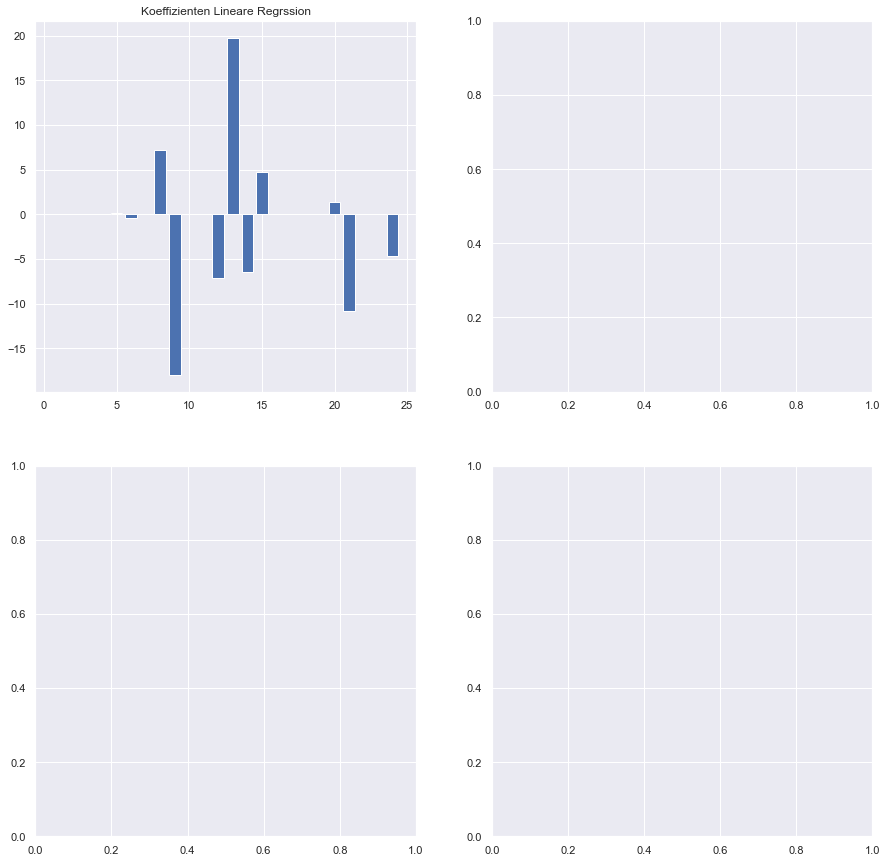

In [184]:
def plot_one_method(ax, title, x):
    ax.set_title(title)
    ticks = np.arange(1, len(x) + 1)
    ax.bar(ticks, x)
    ax.set_xticks(ticks=ticks, labels=list(X_train.columns), rotation=90)


fig, ax = plt.subplots(2,2, figsize=(15,15))

plot_one_method(ax[0,0], "Koeffizienten Lineare Regrssion", methods["linregr"].coef_)
plot_one_method(ax[0,1], "Feature Importance beim Entscheidungsbaum", methods["tree"].feature_importances_)
plot_one_method(ax[1,0], "Feature Importance beim Random Forest", methods["forest"].feature_importances_)
plot_one_method(ax[1,1], "Feature Importance beim AdaBoost", methods["ada"].feature_importances_)

In [282]:
# ENSEMBLE

In [185]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

In [186]:
models = {"Adaboost": AdaBoostClassifier(), 
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "Logistische Regression": LogisticRegression(),
          "kNN": KNeighborsClassifier()}

In [187]:
for name, model in models.items():
    model.fit(X_train,y_train)
    print("Model {} scored with an accuracy of {:.2f}%".format(name, model.score(X_test, y_test)*100))

ValueError: Unknown label type: 'continuous'

In [188]:
vc = VotingClassifier([(name, model) for name, model in models.items()])
vc.fit(x_train, y_train)
vc.score(x_test, y_test)

ValueError: Unknown label type: 'continuous'